## 14. 순환신경망 ##
### 14.1 순환뉴런 ###

![RNN1](images/rnn1.png)

<center><b style="font-size : 1.2em">순환 뉴런 & 타임 스텝으로 펼친 뉴런</b></center>

![RNN2](images/rnn2.png)

<center><b style="font-size : 1.2em">순환 뉴런의 층 & 타입 스텝으로 펼쳐진 층</b></center>

각 순환 뉴런은 두 개의 가중치 $\mathbf{w}_{x}$ 와 $\mathbf{w}_{y}$ 를 가지는데, $\mathbf{w}_{x}$ 는 $\mathbf{x}_{t}$ 를 위한 것이고 $\mathbf{w}_{y}$는 이전 타임 스텝의 출력 $\mathbf{y}_{t-1}$을 위한 것이다. 이것을 순환 층(layer) 전체로 생각하면 가중치 벡터 $\mathbf{w}_{x}$ 와 $\mathbf{w}_{y}$ 를 행렬 $\mathbf{W}_{x}$ 와 $\mathbf{W}_{y}$ 로 나타낼 수 있으며 다음의 식과 같이 표현할 수 있다.

$$
\mathbf{y}_{t} = \phi \left( \mathbf{W}_{x}^{T}\cdot\mathbf{x}_{t} + \mathbf{W}_{y}^{T} \cdot\mathbf{y}_{t-1} + \mathbf{b} \right)
$$

<br>

그리고 타임 스텝 $t$ 에서의 미니배치(mini-batch)의 입력을 행렬 $\mathbf{X}_{t}$ 로 나타내어 아래와 같이 순환 층의 출력을 한번에 계산할 수 있다.

$$
\mathbf{Y}_{t}= \phi \left( \mathbf{X}_{t} \cdot \mathbf{W}_{x} + \mathbf{Y}_{t-1} \cdot \mathbf{W}_{y} + \mathbf{b} \right)
$$

$$
= \phi \left( \begin{bmatrix} \mathbf{X}_{t} \mathbf{Y}_{t-1} \end{bmatrix}\begin{bmatrix} \mathbf{W}_{x} \\ \mathbf{W}_{y} \end{bmatrix} + \mathbf{b} \right)
$$

$$
여기서 W = \begin{bmatrix} \mathbf{W}_{x} \\ \mathbf{W}_{y} \end{bmatrix}
$$



$\phi$는 활성화 함수이다, RNN에서의 활성화 함수로는 $\tanh$ 가 주로 사용된다


<br/>

<ul>
<li>$\mathbf{Y}_{t}$ : 타임 스텝 $t$에서 미니배치에 있는 각 샘플(미니배치)에 대한 순환 층의 출력이며, <b style="color:red; font-size:1.1em">$m \times n_{\text{neurons}}$</b> 행렬($m$은 미니배치, $n_{\text{neurons}}$은 뉴런 수), <b style="background-color:#00C500">각 뉴런별로 출력값이 나오기때문에 샘플의 수 X 뉴런의 수</b></li>
<li>$\mathbf{X}_{t}$ : 모든 샘플의 입력값을 담고 있는 <b style="color:red; font-size:1.1em">$m \times n_{\text{inputs}}$</b> 행렬 ($n_{\text{inputs}}$은 입력 특성 수)</li>
<li>$\mathbf{W}_{x}$ : 현재 타임 스텝 $t$의 입력에 대한 가중치를 담고 있는 <b style="color:red; font-size:1.1em">$n_{\text{inputs}} \times n_{\text{neurons}}$</b> 행렬</li>
<li>$\mathbf{W}_{y}$ : 이전 타임 스텝 $t-1$ 의 출력에 대한 가중치를 담고 있는 <b style="color:red; font-size:1.1em">$n_{\text{neurons}} \times n_{\text{neurons}}$</b> 행렬</li>
<li>$\mathbf{b}$ : 각 뉴런의 편향(bias)을 담고 있는 $n_{\text{neurons}}$ 크기의 벡터</li>
<li>$\begin{bmatrix} \mathbf{X}_{t} \mathbf{Y}_{t-1} \end{bmatrix}$는 $\mathbf{X}_{t}\mathbf{Y}_{t-1}$을 수평적으로 연결한다는 것을 의미</li>
</ul>
위의 식에서 $\mathbf{Y}_{t}$ 는 $\mathbf{X}_t$ 와 $\mathbf{Y}_{t-1}$의 함수이므로, 타임 스텝 $t=0$ 에서부터 모든 입력에 대한 함수가 된다. 첫 번째 타임 스텝인 $t=0$ 에서는 이전의 출력이 없기 때문에 일반적으로 $0$으로 초기화 한다.

### 입력과 출력 시퀀스 ###

![RNN4](images/rnn4.png)


<ul>
    <li><p><b>Vector to Sequence</b> : 첫 번째 타임 스텝에서 단 하나의 입력만 네트워크에 주입하고(다른 모든 타임 스텝에서는 0 주입) 출력시퀀스 연결, 예)이미지 캡션 출력</p></li>
    <li><p><b>Sequence to Vector</b> : 입력시퀀스를 네트워크에 주입하고, 마지막을 제외한 모든 출력을 무시, 예)감성점수 출력</p></li>
    <li><p><b>Sequence to Sequence</b> : 입력시퀀스를 받아 출력시퀀스를 만듬, 예)주식가격 예측</p></li>
    <li><p><b>Delayed Sequence to Sequence</b> : 시퀀스-투-벡터(인코더) 뒤에 벡터-투-시퀀스(디코더) 연결, 예)문장 번역</p></li>
</ul>

### 14.2 텐서플로로 기본 RNN 구성하기 ###

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
## GPU 메모리 관리 ##
#1번 방법
config = tf.ConfigProto()
config.gpu_options.allow_growth = True #메모리 수요에 따라 할당

'''주의할 점은, 이 옵션은 메모리의 증식만 가능하다는 것. 연산이 끝나고 메모리가 필요없는 상황이라고 해서 할당된 메모리를 반납하지 않는다. 

Tensorflow 측에서는 그럴 경우 더 심한 메모리 파편화를 일으킬 수도 있다고 하니 판단은 독자의 몫.'''

'주의할 점은, 이 옵션은 메모리의 증식만 가능하다는 것. 연산이 끝나고 메모리가 필요없는 상황이라고 해서 할당된 메모리를 반납하지 않는다. \n\nTensorflow 측에서는 그럴 경우 더 심한 메모리 파편화를 일으킬 수도 있다고 하니 판단은 독자의 몫.'

In [2]:
tf.reset_default_graph()

n_inputs = 3 #입력 특성의 개수
n_neurons = 5 #순환 뉴런층 안에 있는 뉴런의 개수

X0 = tf.placeholder(tf.float32, [None, n_inputs]) #step0에서 입력
X1 = tf.placeholder(tf.float32, [None, n_inputs]) #step1에서 입력

Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons], dtype=tf.float32)) #입력을 위한 가중치
Wy = tf.Variable(tf.random_normal(shape=[n_neurons, n_neurons], dtype=tf.float32)) #출력을 위한 가중치
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32)) #편향

Y0 = tf.tanh(tf.matmul(X0, Wx) + b) #step0에서 출력
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b) #step1에서 출력

init = tf.global_variables_initializer()

In [3]:
#미니배치            샘플0      샘플1      샘플2      샘플3
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0 ,1]]) #step0에서 입력
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) #step1d에서 입력

with tf.Session() as sess:
    sess.run(init)
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})
    
print('Y0_val:{}\n{}'.format(Y0_val.shape, Y0_val))  # shape: (4, 5) → (샘플 개수, 뉴런 개수)
print('Y1_val:{}\n{}'.format(Y1_val.shape, Y1_val))  # shape: (4, 5) → (샘플 개수, 뉴런 개수)

Y0_val:(4, 5)
[[-0.43867782 -0.43493494  0.9827718   0.6052453   0.9521415 ]
 [-0.9912529  -0.9538943   0.9999988   0.9999891   0.9999992 ]
 [-0.9999011  -0.99717605  1.          1.          1.        ]
 [-0.99999964  0.9985307   0.9999456   0.99999994  0.9991321 ]]
Y1_val:(4, 5)
[[-0.99988806 -0.9071155   1.          1.          1.        ]
 [ 0.9330759   0.97311336  0.9372936   0.07363564 -0.9072335 ]
 [-0.98252815 -0.18634532  0.99999994  1.          0.9999996 ]
 [ 0.8889262   0.4370229   0.8731952   0.9993633   0.88480276]]


In [20]:
#위와 동일한 코드

tf.reset_default_graph()

n_inputs = 3
n_neurons = 5

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

# BasicRNNCell
basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
# static_rnn()
output_seqs, states = tf.nn.static_rnn(cell=basic_cell, inputs=[X0, X1],
                                           dtype=tf.float32) #셀을 연결하여 펼쳐진 RNN네트워크를 만듬
Y0, Y1 = output_seqs #각 타임스텝에서의 출력 텐서를 담고있는 리스트, 네트워크의 최종 상태를 담고있는 텐서

#미니배치
# t = 0
X0_batch = np.array([[0, 1, 2],  # sample 0
                     [3, 4, 5],  # sample 1
                     [6, 7, 8],  # sample 2
                     [9, 0, 1]]) # sample 3
# t = 1
X1_batch = np.array([[9, 8, 7], 
                     [3, 4, 5], 
                     [6, 5, 4], 
                     [3, 2, 1]])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})
    
print('Y0_val:{}\n{}'.format(Y0_val.shape, Y0_val))  # shape: (4, 5) → (샘플 개수, 뉴런 개수)
print('Y1_val:{}\n{}'.format(Y1_val.shape, Y1_val))  # shape: (4, 5) → (샘플 개수, 뉴런 개수)

Y0_val:(4, 5)
[[ 0.6665392  -0.27402034 -0.14346613  0.7007153   0.5232706 ]
 [ 0.8718256  -0.96863294  0.9426004   0.3721035   0.98638576]
 [ 0.9542055  -0.9991093   0.99869287 -0.08676071  0.99969983]
 [-0.99974024 -0.9242235   0.9999719  -0.99957     0.99999136]]
Y1_val:(4, 5)
[[ 0.6852712  -0.99996364  0.99999326 -0.984032    0.9999805 ]
 [ 0.94351286 -0.98605835  0.99266964 -0.08152092  0.9966243 ]
 [ 0.6018127  -0.9986716   0.99989456 -0.9759625   0.9991661 ]
 [ 0.54286885 -0.9488012   0.986592   -0.9866974   0.75857   ]]


In [34]:
#출력텐서 간단하게 만들기

tf.reset_default_graph()

n_inputs = 3
n_neurons = 5
n_steps = 2

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs]) #타임스텝별로 입력을 만드는 대신 타입스템만큼의 열을 만듬
X_seqs = tf.unstack(tf.transpose(X, perm=[1, 0, 2])) #입력데이터의 열을 바꾸고 하나씩 꺼냄

# BasicRNNCell
basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
# static_rnn()
output_seqs, states = tf.nn.static_rnn(basic_cell, X_seqs, dtype=tf.float32) #셀을 연결하여 펼쳐진 RNN네트워크를 만듬
outputs = tf.transpose(tf.stack(output_seqs), perm=[1, 0 ,2]) #모든 출력을 하나의 텐서로 합침

#미니배치
X_batch = np.array([[[0, 1, 2], [9, 8, 7]], # sample 0
                     [[3, 4, 5], [3, 4, 5]], # sample 1
                     [[6, 7, 8], [6, 5, 4]], # sample 2
                     [[9, 0, 1], [3, 2, 1]]]) # sample 3

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    outputs_val = outputs.eval(feed_dict={X: X_batch})
    
print(outputs_val) # shape: (4, 2, 5) → (샘플 개수, 타임스텝 개수, 뉴런 개수)

[[[-0.1105443  -0.50030005 -0.35142988  0.9068353  -0.3320599 ]
  [-0.9999975  -0.96750146 -0.6956085   0.83011717 -1.        ]]

 [[-0.9874154  -0.8828229  -0.7572333   0.9866959  -0.99804294]
  [-0.987381   -0.93349     0.52412933  0.97658026 -0.99984115]]

 [[-0.99989986 -0.9770097  -0.92350227  0.998166   -0.9999962 ]
  [-0.99985003 -0.91482174  0.6592921   0.27506992 -0.9999988 ]]

 [[-0.99841654 -0.8882804  -0.9894495  -0.99995464 -0.9999384 ]
  [-0.998729   -0.82644653  0.79904616  0.02509189 -0.99954045]]]


### static_rnn()의 문제점

<span>static_rnn() 함수의 문제는 타임 스텝마다 하나의 셀을 그래프에 추가하기 때문에, 만약 타임 스텝이 많아질 경우 그래프가 매우 복잡해진다는 것이다.</span>
<br>
<span>쉽게 말하면, for문과 같이 반복문을 쓰지않고 동일한 셀을 타임 스텝별로 만드는 것이라 할 수 있다.</span>
<br>
<span>이럴 경우 타임 스텝이 많아서 그래프가 커지게되면 역전파(backprop)시 메모리 부족(OOM, Out-Of-Memory)에러가 발생할 수 있다.</span>
    
<span>이러한 문제를 해결할 수 있는 방법으로는 tf.nn.dynamic_rnn()이 있다.</span>

## 2.2 동적으로 타임 스텝 펼치기

<p style="font-size:1.1em">tf.nn.dynamic_rnn() 함수는 적절한 타임 스텝에 걸쳐 셀을 실행하기 위해 tf.while_loop() 연산을 사용.</p>
<p style="font-size:0.9em;color:blue">tf.while_loop() 연산을 사용하면 타임 스텝의 크기에 상관없이 하나의 행렬곱 연산 tf.matmul()만 생성함</p>
<br>
<p style="font-size:1.1em">GPU메모리에서 CPU메모리로 바꾸어 역전파 시에 OOM(Out-Of-Memory)에러를 피하기 위해 tf.nn.dynamic_rnn(swap_memory=True) 설정</p>
<p style="font-size:1.1em">이 함수는 각 타임 스텝의 모든 입력에 대해 텐서 하나를 받고([None, n_steps, n_inputs]), 타임 스텝마다의 모든 출력을 하나의 텐서([None, n_steps, n_neurons])로 반환</p>
<p style="font-size:0.9em;color:blue">tf.stack, tf.unstack, tf.transpose 사용할 필요 없음!!</p>

In [40]:
#출력텐서 간단하게 만들기

tf.reset_default_graph()

n_inputs = 3
n_neurons = 5
n_steps = 2

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs]) #타임스텝별로 입력을 만드는 대신 타입스템만큼의 열을 만듬
#tf.stack 사용할 필요없음
#X_seqs = tf.unstack(tf.transpose(X, perm=[1, 0, 2])) #입력데이터의 열을 바꾸고 하나씩 꺼냄

# BasicRNNCell
basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
# static_rnn()
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32, swap_memory=True) #OOM시 메인 메모리 사용
#tf.stack, tftranspose 사용할 필요없음
#outputs = tf.transpose(tf.stack(output_seqs), perm=[1, 0 ,2]) #모든 출력을 하나의 텐서로 합침

#미니배치
X_batch = np.array([[[0, 1, 2], [9, 8, 7]], # sample 0
                     [[3, 4, 5], [3, 4, 5]], # sample 1
                     [[6, 7, 8], [6, 5, 4]], # sample 2
                     [[9, 0, 1], [3, 2, 1]]]) # sample 3

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    outputs_val = outputs.eval(feed_dict={X: X_batch})
    
print(outputs_val) # shape: (4, 2, 5) → (샘플 개수, 타임스텝 개수, 뉴런 개수)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
[[[ 0.85334516  0.8141438   0.313379   -0.69611907  0.28773725]
  [ 0.99999994  1.          0.9913502  -0.8543494   0.98387647]]

 [[ 0.99980074  0.9998129   0.86700404 -0.8867808   0.8650835 ]
  [ 0.99959165  0.999959    0.9114392  -0.97390735  0.7209359 ]]

 [[ 0.99999976  0.9999998   0.98077375 -0.9605962   0.98125607]
  [ 0.99991673  0.9999967   0.95923656 -0.76816344  0.86428374]]

 [[ 0.9999454   0.9983292  -0.8371234   0.99967825 -0.3139772 ]
  [ 0.90131366  0.9690799  -0.28888935 -0.15881321  0.7139215 ]]]


## 2.3 가변 길이 입력 시퀀스 다루기

문장같은 가변 길이 입력 시퀀스를 다루기 위해서는 <b style="background-color:#0cf">tf.nn.dynamic_rnn(sequence_length={입력 시퀀스 길이}),</b> 또는<b style="background-color:#0ca">tf.nn.static_rnn(sequence_length={입력 시퀀스 길이})</b>를 설정해야 함

In [45]:
#출력텐서 간단하게 만들기

tf.reset_default_graph()

n_inputs = 3
n_neurons = 5
n_steps = 2

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs]) #타임스텝별로 입력을 만드는 대신 타입스템만큼의 열을 만듬
seq_length = tf.placeholder(shape=[None], dtype=tf.float32)

# BasicRNNCell
basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
# static_rnn()
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32, swap_memory=True, sequence_length=seq_length) #가변길이 설정

#미니배치
X_batch = np.array([[[0, 1, 2], [9, 8, 7]], # sample 0
                     [[3, 4, 5], [0, 0, 0]], # sample 1, 모자란 부분은 0으로 채워서 길이를 맞춰줌(0으로 패딩시킴)
                     [[6, 7, 8], [6, 5, 4]], # sample 2
                     [[9, 0, 1], [3, 2, 1]]]) # sample 3
seq_length_batch = [2, 1, 2, 2] #입력데이터의 길이

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X: X_batch, seq_length: seq_length_batch})

print("-------------------- outputs_val --------------------")
print(outputs_val) # shape: (4, 2, 5) → (샘플 개수, 타임스텝 개수, 뉴런 개수)

print()

print("-------------------- states_val --------------------")
print(states_val) # shape: (4,5) → (샘플 개수, 뉴런 개수), 0벡터가 제외된 각 셀의 마지막 상태를 담음

-------------------- outputs_val --------------------
[[[ 0.1711922  -0.6476346   0.39549306  0.03427123  0.35730192]
  [ 0.9999266  -0.99998343  0.16134876 -0.99387264  0.9853087 ]]

 [[ 0.95986235 -0.9952373   0.36473402 -0.6991825   0.88534856]
  [ 0.          0.          0.          0.          0.        ]]

 [[ 0.9988153  -0.9999467   0.33315763 -0.9431344   0.98450124]
  [ 0.979026   -0.9992811   0.27179083 -0.9526911   0.7239816 ]]

 [[ 0.9736584  -0.99963105  0.80333865 -0.9926766  -0.85368717]
  [ 0.91740143 -0.95162207  0.2917505  -0.06991738  0.03283571]]]

-------------------- states_val --------------------
[[ 0.9999266  -0.99998343  0.16134876 -0.99387264  0.9853087 ]
 [ 0.95986235 -0.9952373   0.36473402 -0.6991825   0.88534856]
 [ 0.979026   -0.9992811   0.27179083 -0.9526911   0.7239816 ]
 [ 0.91740143 -0.95162207  0.2917505  -0.06991738  0.03283571]]


# RNN 훈련하기

## 1) BPTT(Back Propagation Through Time)

타임 스텝으로 네트워크를 펼치고 보통의 역전파를 사용하는 것


![BPTT](images/bptt1.png)

각 타임 스텝마다 같은 매개변수 $\mathbf{W}$ 와 $\mathbf{b}$ 이 사용되기 때문에 역전파가 진행되면서 모든 타임 스텝에 걸쳐 매개변수 값이 합산됨. 이렇게 업데이트된 가중치는 순전파 동안에는 모든 타임 스텝에 동일한 가중치가 적용됨.

## 2) Truncated BPTT

BPTT는 전체의 타임 스텝마다 처음부터 끝까지 역전파를 하기 때문에 타임 스텝이 클 수록 계산량이 많아지는 문제가 있다. 이러한 계산량 문제를 해결하기 위해 전체 타임 스텝을 일정 구간(예를들어 3 또는 5 구간)으로 나눠 역전파를 하는 Truncated BPTT를 사용

![BPTT2](images/bptt2.png)

하지만 truncated-BPTT의 문제는 만약 학습 데이터가 장기간에 걸쳐 패턴이 발생한다고 하면, 이러한 장기간(Long-Term)의 패턴을 학습할 수 없는 문제가 있다.

## ★ 시퀀스 분류기 훈련하기

![sc](images/seq_classifier.jpg)

<ul style="font-size:1.2em">
    <li>MNIST이미지 훈련</li>
    <li>150개의 순환뉴런으로 된 셀</li>
    <li>마지막 타임 스텝의 출력에 10개 뉴런으로 된 완전 연결 신경망 연결</li>
    <li>완전 연결 신경망에 소프트맥스 연결</li>
</ul>

In [3]:
#MNIST 데이터 로드
################
# Layer Params #
################
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()
train_x = train_x.astype(np.float32).reshape(-1, 28*28) / 255.0  # (784,)
test_x = test_x.astype(np.float32).reshape(-1, 28*28) / 255.0
train_y = train_y.astype(np.int32)
test_y = test_y.astype(np.int32)
valid_x, train_x = train_x[:5000], train_x[5000:]
valid_y, train_y = train_y[:5000], train_y[5000:]

#28(가로크기) x 28(세로크기) x 배치크기 → 배치크기 x 28(타임스텝) x 28(입력특성의 개수)
test_x = test_x.reshape([-1, n_steps, n_inputs])
valid_x = valid_x.reshape([-1, n_steps, n_inputs])

print('train_x.shape :', train_x.shape)
print('valid_x.shape :', valid_x.shape)
print('test_x.shape :', test_x.shape)

train_x.shape : (55000, 784)
valid_x.shape : (5000, 28, 28)
test_x.shape : (10000, 28, 28)


In [5]:
#미니배치
def shuffle_batch(features, labels, batch_size):
    rnd_idx = np.random.permutation(len(features))
    n_batches = len(features) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        batch_x, batch_y = features[batch_idx], labels[batch_idx]
        yield batch_x, batch_y

In [31]:
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
labels = tf.placeholder(tf.int32, [None])

# RNN Model
basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
outputs, states = tf.nn.dynamic_rnn(basic_cell, inputs, dtype=tf.float32)
# dense layer
logits = tf.layers.dense(states, n_outputs)  #10개의 뉴런으로 된 완전신경망

# loss
xentropy = tf.reduce_mean(
    tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits))

################
# Train Params #
################
learning_rate = 0.001
n_epochs = 30
batch_size = 300

# optimizer
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(xentropy)

# metric
correct = tf.nn.in_top_k(logits, labels, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

# Train
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(n_epochs):
        for batch_x, batch_y in shuffle_batch(train_x, train_y, batch_size):
            batch_x = batch_x.reshape([-1, n_steps, n_inputs])
            sess.run(train_op, 
                     feed_dict={inputs: batch_x, labels: batch_y})
        acc_batch = accuracy.eval(feed_dict={inputs: batch_x, labels: batch_y})
        acc_valid = accuracy.eval(feed_dict={inputs: valid_x, labels: valid_y})
        loss_batch = xentropy.eval(feed_dict={inputs: batch_x, labels: batch_y})
        print('epoch : {:03d}'.format(epoch),
              'acc_batch : {:.4f}, acc_valid : {:.4f}'.format(acc_batch, acc_valid),
              'loss_batch : {:.4f}'.format(loss_batch))

epoch : 000 acc_batch : 0.9033, acc_valid : 0.9302 loss_batch : 0.2562
epoch : 001 acc_batch : 0.9667, acc_valid : 0.9506 loss_batch : 0.1459
epoch : 002 acc_batch : 0.9667, acc_valid : 0.9580 loss_batch : 0.1046
epoch : 003 acc_batch : 0.9800, acc_valid : 0.9670 loss_batch : 0.1017
epoch : 004 acc_batch : 0.9767, acc_valid : 0.9712 loss_batch : 0.0943
epoch : 005 acc_batch : 0.9600, acc_valid : 0.9738 loss_batch : 0.1606
epoch : 006 acc_batch : 0.9633, acc_valid : 0.9738 loss_batch : 0.0975
epoch : 007 acc_batch : 0.9900, acc_valid : 0.9778 loss_batch : 0.0578
epoch : 008 acc_batch : 0.9667, acc_valid : 0.9762 loss_batch : 0.0746
epoch : 009 acc_batch : 0.9933, acc_valid : 0.9748 loss_batch : 0.0277
epoch : 010 acc_batch : 0.9867, acc_valid : 0.9762 loss_batch : 0.0527
epoch : 011 acc_batch : 0.9867, acc_valid : 0.9790 loss_batch : 0.0598
epoch : 012 acc_batch : 0.9867, acc_valid : 0.9824 loss_batch : 0.0508
epoch : 013 acc_batch : 0.9833, acc_valid : 0.9822 loss_batch : 0.0569
epoch 

# 시계열 예측을 위해 훈련하기

In [3]:
## 데이터 만들기 ##
t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution #[0, 0.1, 0.2 ...]
    ys = time_series(Ts) #label
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1) #[데이터개수, 스텝, 특성개수]

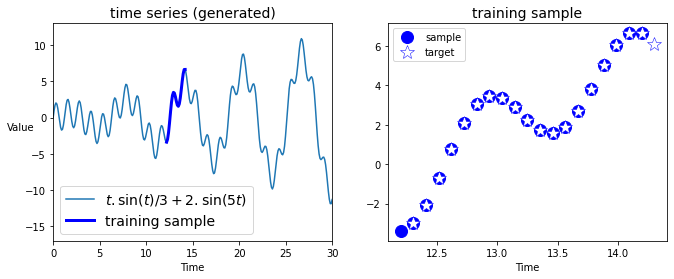

In [4]:
## 샘플데이터 ##

t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("time series (generated)", fontsize=14)
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label="training sample")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("Time")
plt.ylabel("Value", rotation=0)

plt.subplot(122)
plt.title("training sample", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=12, label="sample")
plt.plot(t_instance[1:], time_series(t_instance[1:]), 
         "w*", markeredgewidth=0.5, markeredgecolor="b", markersize=14, label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

## OutputProjectionWrapper를 사용한 RNN 모델링

![OutputProjectionWrapper](images/OutputProjectionWrapper.png)

셀 래퍼는 보통의 셀과 매우 비슷하게 작동하며 모든 메서도 호출을 감싼 셀로 전달함.
OutputProjectionWrapper는 각 출력의 상단에 (어떤 활성화 함수 없이) 선형 뉴런으로 구성된 완전 연결 층을 추가.
셀의 출력에는 영향을 미치지만 셀의 상태에는 영향을 미치지 않음.(샐 래퍼의 완전 연결 층은 outputs에만 적용되고 states에는 적용 안됨)

In [9]:
## OutputProjectionWrapper 사용 ##

tf.reset_default_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

inputs = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
labels = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

# RNN Model
#basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
basic_cell = tf.contrib.rnn.OutputProjectionWrapper( #각 출력의 상단에 선형 뉴런으로 구성된 완전 연결층 추가
    tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu),
    output_size=n_outputs
)
outputs, states = tf.nn.dynamic_rnn(basic_cell, inputs, dtype=tf.float32)
# dense layer
logits = tf.layers.dense(states, n_outputs)  #1개의 뉴런으로 된 완전신경망

# loss
#xentropy = tf.reduce_mean(
#    tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits))
mse = tf.losses.mean_squared_error(labels=labels, predictions=outputs)

# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(mse)

################
# Train Params #
################
learning_rate = 0.001
n_epoch = 10000
batch_size = 300

# Train
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for iteration in range(n_epoch):
        batch_x, batch_y = next_batch(batch_size, n_steps)
        sess.run(train_op, feed_dict={inputs: batch_x, labels: batch_y})
        if iteration % 1000 == 0:
            loss = mse.eval(feed_dict={inputs: batch_x, labels: batch_y})
            print('step: {:03d}, MSE: {:.4f}'.format(iteration, loss))
            
    # 새로운 데이터 예측하기
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={inputs: X_new})
    
print('y_pred:{}\n{}'.format(y_pred.shape, y_pred))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
step: 000, MSE: 15.5452
step: 1000, MSE: 0.1046
step: 2000, MSE: 0.0678
step: 3000, MSE: 0.0551
step: 4000, MSE: 0.0459
step: 5000, MSE: 0.0368
step: 6000, MSE: 0.0359
step: 7000, MSE: 0.0386
step: 8000, MSE: 0.0373
step: 9000, MSE: 0.0342
y_pred:(1, 20, 1)
[[[-3.3690712]
  [-2.4315894]
  [-0.7474268]
  [ 0.66323  ]
  [ 2.1067283]
  [ 3.073393 ]
  [ 3.4223695]
  [ 3.327913 ]
  [ 2.8488598]
  [ 2.2151186]
  [ 1.7143476]
  [ 1.5609294]
  [ 1.8800949]
  [ 2.686378 ]
  [ 3.815561 ]
  [ 5.0317407]
  [ 6.0353937]
  [ 6

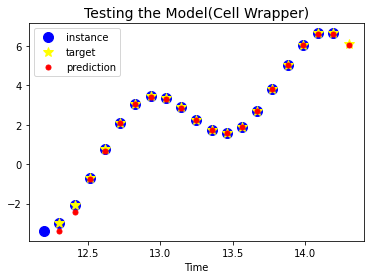

평균오차 : 0.061981


In [11]:
## 예측 데이터 시각화 ##
plt.title("Testing the Model(Cell Wrapper)", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target", color='yellow')
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

print(f"평균오차 : {np.mean(np.abs(y_pred[0,:,0] - time_series(t_instance[1:]))):.6f}")

## 셀 레퍼보다 효율적인 RNN 모델링

![timernn](images/timernn.png)

OutputProjectionWrapper는 RNN의 출력 시퀀스 차원을 타임 스텝마다 하나의 값으로 줄이는 가장 간단한 솔루션이지만 효율적이는 않음.
다음은 OutputProjectionWrapper보다 효율적인 방법 과정이다.

<ol>
<li>각 타임 스텝마다 (batch_size, n_neurons) 출력 벡터를 tf.reshape()을 이용해 쌓는다(stack).</li>
    <ol>[배치크기, 스텝, 뉴런개수] → [배치크기 x 스텝, 뉴런개수]</ol>
<li>1개의 유닛을 가지는 Fully-Connected Layer를 적용한다. 이때의 FC Layer는 단지 차원 축소를 위한 레이어이기 때문에 활성화 함수를 사용하지 않는다.</li>
<li>마지막으로, tf.reshape()을 이용해 차원 축소시킨 출력을 다시 타임 스텝별로 풀어준다(unstack).</li>
    <ol>[배치크기 x 스텝, 뉴런개수] → [배치크기, 스텝, 뉴런개수]</ol>
</ol>

In [19]:
## OutputProjectionWrapper 사용안함 ##

tf.reset_default_graph()

n_steps = 20
n_neurons = 100
n_inputs = 1
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

# RNN Model
cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu) #셀 래퍼를 사용하지 않는 기본 셀 사용
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

# dense layer
# 하나의 출력을 위한 작업
stacked_rnn_outputs = tf.reshape(tensor=rnn_outputs, shape=[-1, n_neurons]) #[배치크기, 스텝, 뉴런개수] → [배치크기 x 스텝, 뉴런개수]
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs) #뉴런 개수만큼의 출력을 하나의 출력으로 만듬
predictions = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs]) #[배치크기 x 스텝, 뉴런개수] → [배치크기, 스텝, 뉴런개수]

################
# Train Params #
################
learning_rate = 0.001
n_iterations = 10000
batch_size = 300

# loss
mse = tf.losses.mean_squared_error(labels=y, predictions=predictions)
# optimizer
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(mse)

#Saver
saver = tf.train.Saver()

# Train
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for iteration in range(n_iterations):
        batch_x, batch_y = next_batch(batch_size, n_steps)
        sess.run(train_op, feed_dict={X: batch_x, y: batch_y})
        if iteration % 1000 == 0:
            loss = mse.eval(feed_dict={X: batch_x, y: batch_y})
            print('step: {:03d}, MSE: {:.4f}'.format(iteration, loss))
            
    # 새로운 데이터 예측하기
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(predictions, feed_dict={X: X_new})
    
    #모델 저장
    saver.save(sess, "./my_time_series_model")
    
print('y_pred:{}\n{}'.format(y_pred.shape, y_pred))

step: 000, MSE: 21.0440
step: 1000, MSE: 0.0517
step: 2000, MSE: 0.0452
step: 3000, MSE: 0.0382
step: 4000, MSE: 0.0408
step: 5000, MSE: 0.0389
step: 6000, MSE: 0.0373
step: 7000, MSE: 0.0350
step: 8000, MSE: 0.0347
step: 9000, MSE: 0.0366
y_pred:(1, 20, 1)
[[[-3.3105013]
  [-2.4933732]
  [-0.7979438]
  [ 0.7485072]
  [ 2.094326 ]
  [ 3.0665073]
  [ 3.463848 ]
  [ 3.3567717]
  [ 2.8664312]
  [ 2.225934 ]
  [ 1.7086749]
  [ 1.5650887]
  [ 1.8976834]
  [ 2.7047272]
  [ 3.841031 ]
  [ 5.052713 ]
  [ 6.0638638]
  [ 6.6470766]
  [ 6.6172123]
  [ 6.0505   ]]]


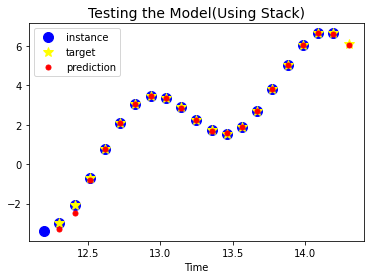

평균오차 : 0.055231


In [20]:
## 예측 데이터 시각화 ##
plt.title("Testing the Model(Using Stack)", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target", color='yellow')
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

print(f"평균오차 : {np.mean(np.abs(y_pred[0,:,0] - time_series(t_instance[1:]))):.6f}")

## RNN의 창조성

모델을 사용해 새로운 시퀀스를 창조할 수 있다.
<ol>
    <li>생성을 위해 필요한 n_steps 값을 가지는 시드 시퀀스(0으로 채워진 시퀀스) 생성.</li>
    <li>예측한 값을 시퀀스 끝에 추가</li>
    <li>마지막 n_steps 값을 모델에 주입하여 다음 값을 예측</li>
</ol>

INFO:tensorflow:Restoring parameters from ./my_time_series_model


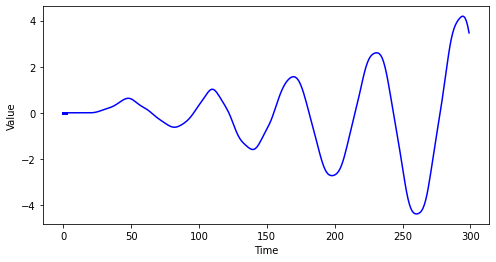

In [31]:
## 새 시퀀스 창조 ##

#새 데이터
sequence = [0. for i in range(n_steps)]
predict_count = 30

with tf.Session() as sess:
    saver.restore(sess, "./my_time_series_model")
            
    for iteration in range(len(t) - n_steps):        
        # 새로운 데이터 예측하기
        X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(predictions, feed_dict={X: X_batch})
        sequence.append(y_pred[0, -1, 0])

plt.figure(figsize=(8,4))
plt.plot(np.arange(len(sequence)), sequence, "b-")
plt.plot(t[:n_steps], sequence[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

INFO:tensorflow:Restoring parameters from ./my_time_series_model


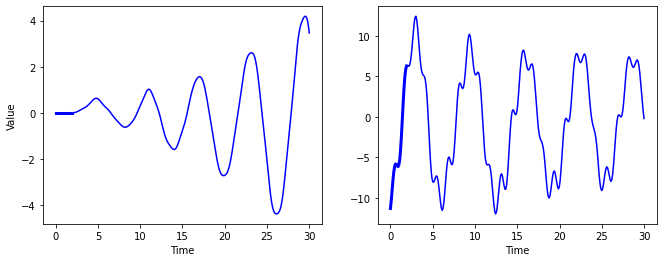

In [28]:
## 새 시퀀스 창조 ##

with tf.Session() as sess:
    saver.restore(sess, "./my_time_series_model")

    sequence1 = [0. for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence1[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(predictions, feed_dict={X: X_batch})
        sequence1.append(y_pred[0, -1, 0])

    sequence2 = [time_series(i * resolution + t_min + (t_max-t_min/3)) for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence2[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(predictions, feed_dict={X: X_batch})
        sequence2.append(y_pred[0, -1, 0])

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(t, sequence1, "b-")
plt.plot(t[:n_steps], sequence1[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.plot(t, sequence2, "b-")
plt.plot(t[:n_steps], sequence2[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")

plt.show()

# 심층 RNN

셀을 여러 층으로 쌓는 것은 상당히 일반적이여, 이를 심층RNN이라고 한다.

![deepRNN](images/deppRNN.png)

심층RNN을 텐서플로로 구현하려면 여러 개의 셀을 만들어 이를 <b>tf.nn.rnn_cell.MultiRNNCell</b>로 쌓아올려야 함.

In [7]:
tf.reset_default_graph()

n_inputs = 2
n_steps = 5
n_neurons = 100
n_layers = 3

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

layers =[tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu) for _ in range(n_layers)] #심층RNN에 들어갈 여러개의 셀
multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(layers) #여러 개의 셀을 쌓음
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell,
                                     X,
                                     dtype=tf.float32
                                    #state_is_tuple=False #states는 열 방향을 따라 합쳐짐, 각 층의 상태를 담고 있는 하나의 텐서가 됨
                                    )

# Sample data
batch_x = np.random.rand(2, n_steps, n_inputs)  # shape: (2, 5, 2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X: batch_x})
    
print('outputs_val:{}'.format(outputs_val.shape)) #[배치크기, 스텝, 뉴런개수]

outputs_val:(2, 5, 100)


## 여러 GPU에 심층 RNN 분산하기

각기 다른 device() 블록 안에서 셀을 만드는 것은 문제가 된다. <b>tf.nn.rnn_cell.BasicRNNCell</b>는 셀 팩토리이고 셀 자체가 아니기 때문이다.(팩토리를 만들 때 어떤 셀도 생성되지 않으며 아무런 변수도 생성되지 않기때문, 실제 셀은 나중에 <b>tf.nn.dynamic_rnn</b>을 호출할 때 <b>tf.nn.rnn_cell.MultiRNNCell</b>가 호출되고 각 개별적인 <b>tf.nn.rnn_cell.BasicRNNCell</b>이 호출되어 실제 셀을 생성)

In [9]:
tf.reset_default_graph()

with tf.device("/gpu:0"):  # 무시됨!!
    layer1 = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)

with tf.device("/gpu:1"):  # 무시됨!!
    layer2 = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)

In [11]:
# 자신만의 셀 래퍼를 만들어서 해결
import tensorflow as tf

class DeviceCellWrapper(tf.nn.rnn_cell.RNNCell):
    def __init__(self, device, cell):
        self.__cell = cell
        self.__device = device
        
    @property
    def state_size(self): #단순히 모드 메소드 호출을 대신해 매개변수로 전달된 셀의 메소드를 호출
        return self.__cell.state_size
    
    @property
    def output_size(self):
        return self.__cell.output_size
    
    def __call__(self, inputs, state, scope=None):
        with tf.device(self.__device):
            return self.__cell(inputs, state, scope)

In [12]:
tf.reset_default_graph()

n_inputs = 2
n_steps = 5
n_neurons = 100
n_layers = 3
devices = ["/gpu:0", "/cpu:0", "/gpu:0"] #분산할 장비들

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

cells =[DeviceCellWrapper(dev, tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)) for dev in devices] #심층RNN에 들어갈 여러개의 셀
multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(cells) #여러 개의 셀을 쌓음
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell,
                                     X,
                                     dtype=tf.float32
                                    #state_is_tuple=False #states는 열 방향을 따라 합쳐짐, 각 층의 상태를 담고 있는 하나의 텐서가 됨
                                    )

# Sample data
batch_x = np.random.rand(2, n_steps, n_inputs)  # shape: (2, 5, 2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X: batch_x})
    
print('outputs_val:{}'.format(outputs_val.shape)) #[배치크기, 스텝, 뉴런개수]

outputs_val:(2, 5, 100)


## 드롭아웃 적용하기

RNN층 사이에 드롭아웃을 적용하려면 <b>tf.nn.rnn_cell.DropoutWrapper</b> 클래스를 사용해야 함.

In [48]:
tf.reset_default_graph()

n_inputs = 1
n_neurons = 100
n_layers = 3
n_steps = 20
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

# without dropout rate
keep_prob = tf.placeholder_with_default(1.0, shape=()) #드롭아웃 적용 비율
cells = [tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
         for layer in range(n_layers)]
cells_drop = [tf.nn.rnn_cell.DropoutWrapper(cell, input_keep_prob=keep_prob)
              for cell in cells]
multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(cells_drop)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

learning_rate = 0.01

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_iterations = 2000
batch_size = 150
train_keep_prob = 0.5

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        _, mse = sess.run([training_op, loss],
                          feed_dict={X: X_batch, y: y_batch,
                                     keep_prob: train_keep_prob})
        if iteration % 200 == 0:                   # not shown in the book
            print(iteration, "Training MSE:", mse) # not shown
            
    #모델 저장
    saver.save(sess, "./my_time_series_dropout_model")

0 Training MSE: 15.643598
200 Training MSE: 3.09241
400 Training MSE: 3.3486283
600 Training MSE: 2.4113882
800 Training MSE: 2.6125576
1000 Training MSE: 2.2060616
1200 Training MSE: 2.4900203
1400 Training MSE: 3.176126
1600 Training MSE: 2.359642
1800 Training MSE: 2.7890553


INFO:tensorflow:Restoring parameters from ./my_time_series_dropout_model


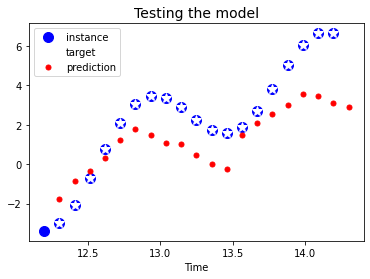

In [50]:
## 데이터 예측 ##

with tf.Session() as sess:
    saver.restore(sess, "./my_time_series_dropout_model")

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})
    
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

## LSTM 셀

### - 장기 의존성(Long-Term Dependency) 문제

RNN은 타임 스텝 $t$에서 이전 타임 스텝($t-1$)의 상태(state, $h_{t-1}$)를 입력으로 받는 구조이기 때문에, 이전의 정보가 현재의 타임 스텝 $t$에 영향을 줄 수 있다. 따라서, RNN의 순환 뉴런(Reccurent Neurons)의 출력은 이전 타임 스텝의 모든 입력에 대한 함수이므로, 이를 메모리 셀(memory cell)이라고 한다.

이렇듯, RNN은 이론적으로 모든 이전 타임 스텝이 영향을 주지만 앞쪽의 타임 스텝(예를 들어 $t=0, t=1$)은 타임 스텝이 길어질 수록 영향을 주지 못하는 문제가 발생하는데 이를 장기 의존성(Long-Term Dependency) 문제라고 한다. 이러한 문제가 발생하는 이유는 입력 데이터가 RNN Cell을 거치면서 특정 연산을 통해 데이터가 변환되어, 일부 정보는 타임 스텝마다 사라지기 때문이다.

![deepRNN](images/Long-Term_Dependency.png)

이러한 문제를 해결하기 위해 장기간의 메모리를 가질 수 있는 여러 종류의 셀이 만들어졌는데, 그 중에서 대표적인 셀들이 LSTM과 GRU 셀이다. 먼저, LSTM 셀에 대해 알아보도록 하자.

### - LSTM 셀

![lstm](images/lstm.png)

위의 그림에서 보면 LSTM 셀에서는 상태(state)가 두 개의 벡터 $\mathbf{h}_t$와 $\mathbf{c}_t$로 나누어 진다는 것을 알 수 있다. <b style="background-color:#3CC">$\mathbf{h}_t$를 단기 상태(short-term state)</b>, <b style="background-color:#5D5">$\mathbf{c}_t$를 장기 상태(long-term state)</b>라고 볼 수 있다.

위의 LSTM 셀을 자세히 살펴보도록 하자. LSTM의 핵심은 네트워크가 장기 상태($\mathbf{c}_t$)에서 기억할 부분, 삭제할 부분, 그리고 읽어 들일 부분을 학습하는 것이다. 장기 기억 $\mathbf{c}_{t-1}$은 셀의 왼쪽에서 오른쪽으로 통과하게 되는데 forget gate를 지나면서 일부를 기억(정보)을 잃고, 그 다음 덧셈(+) 연산으로 input gate로 부터 새로운 기억 일부를 추가한다. 이렇게 만들어진 $\mathbf{c}_t$는 별도의 추가 연산 없이 바로 출력되며, 이러한 장기 기억 $\mathbf{c}_t$는 타임 스텝마다 일부의 기억을 삭제하고 추가하는 과정을 거치게 된다. 그리고 덧셈 연산 후에 $\mathbf{c}_t$는 복사되어 output gate의 $\tanh$함수로 전달되어 단기 상태 $\mathbf{h}_{t}$와 셀의 출력인 $\mathbf{y}_t$를 만든다. 이번에는 위에서 설명한 forget, input, output 게이트(gate)가 어떻게 작동하는지에 대해 알아보도록 하자.

먼저, 현재 입력 벡터 $\mathbf{x}_{t}$와 이전의 단기 상태 $\mathbf{h}_{t-1}$이 네 개의 다른 FC-레이어(Fully-Connected layer)에 주입되는데, 이 레이어는 모두 다음과 같이 다른 목적을 가진다.

<ul>
주요 레이어는 $\mathbf{g}_t​$를 출력하는 레이어이며, 현재 입력 데이터 $\mathbf{x}_t​$와 이전 타임스텝의 단기 상태 $\mathbf{h}_{t-1}​$을 분석하는 역할을 한다. LSTM 셀에서는 이 레이어의 출력인 $\mathbf{g}_{t}​$가 $\mathbf{i}_{t}​$의 곱셈($\times​$)연산 후 장기 상태 $\mathbf{c}_{t}​$에 일부분이 더해지게 된다. 반면에, 기본 RNN 셀에서는 이 레이어만 있으며, 바로 $\mathbf{y}_{t}​$와 $\mathbf{h}_{t}​$로 출력된다.

$\mathbf{f}_{t}, \mathbf{i}_{t}, \mathbf{o}_{t}$를 출력하는 세 개의 레이어에서는 활성화 함수로 시그모이드(sigmoid, logistic)를 사용한다. 시그모이드 함수의 출력의 범위는 0 ~ 1 이며, 이 출력값은 각 forget, input, output 게이트의 원소별(element-wise) 곱셈연산에 입력된다. 따라서, 출력이 0일 경우에는 게이트를 닫고 1일 경우에는 게이트를 열기 때문에 $\mathbf{f}_{t}, \mathbf{i}_{t}, \mathbf{o}_{t}$를 gate controller라고 한다.
        
#### Forget gate : $\mathbf{f}_{t}$에 의해 제어되며 장기 상태 $\mathbf{c}_{t}$의 어느 부분을 삭제할지 제어한다.
#### Input gate : $\mathbf{i}_{t}$에 의해 제어되며 $\mathbf{g}_{t}$의 어느 부분이 장기 상태 $\mathbf{c}_{t}$에 더해져야 하는지 제어한다.
#### Output gate : $\mathbf{o}_{t}$는 장기 상태 $\mathbf{c}_{t}$의 어느 부분을 읽어서 $\mathbf{h}_{t}$ 와 $\mathbf{y}_{t}$로 출력해야 하는지 제어한다.
</ul>
    
다음의 식은 위의 그림에서 타임 스텝 $t$에서, 셀의 장기 상태, 단기 상태, 그리고 각 레이어의 출력을 구하는 식을 나타낸 것이다.

![lstm](images/lstm_function.svg)

#### $\mathbf{W}_{xf}, \mathbf{W}_{xi}, \mathbf{W}_{xo}, \mathbf{W}_{xg}$ : 입력 벡터 $\mathbf{x}_{t}$에 연결된 네 개의 레이어에 대한 가중치 행렬
#### $\mathbf{W}_{hf}, \mathbf{W}_{hi}, \mathbf{W}_{ho}, \mathbf{W}_{hg}$ : 이전 타임스텝의 단기 상태 $\mathbf{h}_{t-1}$에 연결된 네 개의 레이어에 대한 가중치 행렬
#### $\mathbf{b}_{f}, \mathbf{b}_{i}, \mathbf{b}_{o}, \mathbf{b}_{g}$ : 네 개의 레이어에 대한 편향(bias), 텐서플로(TensorFlow)에서는 #### $\mathbf{b}_{f}$ 를 1로 초기화하여 학습 시작시에 모든것을 잃어버리는 것을 방지한다.

In [61]:
## 텐서플로에서 LSTM셀

tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
labels = tf.placeholder(tf.int32, [None])

# LSTM Model
lstm_cells = [tf.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons, activation=tf.nn.elu) #LSTM셀 만들기
              for layer in range(n_layers)]
multi_cell = tf.nn.rnn_cell.MultiRNNCell(lstm_cells)
outputs, states = tf.nn.dynamic_rnn(multi_cell, inputs, dtype=tf.float32) #LSTM셀은 셀 상태(c)와 히든 상태(h) 2개의 상태 저장,
                                                                        #state[layer][0] : 셀 상태, state[layer][1] : 히든 상태
top_layer_h_state = states[-1][1]
# dense layer
logits = tf.layers.dense(top_layer_h_state, n_outputs)  # states = outputs[-1]

# loss
xentropy = tf.reduce_mean(
    tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits))

learning_rate = 0.001
n_epochs = 5
batch_size = 300

# optimizer
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(xentropy)

# metric
correct = tf.nn.in_top_k(logits, labels, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

# Train
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
        for batch_x, batch_y in shuffle_batch(train_x, train_y, batch_size):
            batch_x = batch_x.reshape([-1, n_steps, n_inputs])
            sess.run(train_op, 
                     feed_dict={inputs: batch_x, labels: batch_y})
        acc_batch = accuracy.eval(feed_dict={inputs: batch_x, labels: batch_y})
        acc_valid = accuracy.eval(feed_dict={inputs: valid_x, labels: valid_y})
        loss_batch = xentropy.eval(feed_dict={inputs: batch_x, labels: batch_y})
        print('epoch : {:03d}'.format(epoch),
              'acc_batch : {:.4f}, acc_valid : {:.4f}'.format(acc_batch, acc_valid),
              'loss_batch : {:.4f}'.format(loss_batch))

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
epoch : 000 acc_batch : 0.9267, acc_valid : 0.9364 loss_batch : 0.2297
epoch : 001 acc_batch : 0.9767, acc_valid : 0.9700 loss_batch : 0.1006
epoch : 002 acc_batch : 0.9800, acc_valid : 0.9780 loss_batch : 0.0672
epoch : 003 acc_batch : 0.9833, acc_valid : 0.9834 loss_batch : 0.0592
epoch : 004 acc_batch : 0.9900, acc_valid : 0.9808 loss_batch : 0.0468


## 핍홀 연결

![peephome](images/peephole.png)

기본 LSTM 셀에서 게이트 제어기는 입력 $\mathbf{x}_{t}$와 이전 단기 상태 $\mathbf{h}_{t-1}$만 을 바라 봄.
<br>
게이트 제어기에 장기 상태도 조금 노출시키게 함
<br>
이전 장기 기억 상태 $\mathbf{c}_{t-1}$이 삭제 게이트와 입력 게이트의 제어기 $\mathbf{f}_{t}$와 $\mathbf{i}_{t}$에 입력으로 추가됨.
<br>
현재의 장기 기억 상태 $\mathbf{c}_{t}$는 출력 게이트의 제어기 $\mathbf{o}_{t}$에 입력으로 추가됨.
<br>
LSTM의 변종의 한 종류임

In [62]:
## 텐서플로에서 peephole 연결

tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
labels = tf.placeholder(tf.int32, [None])

# LSTM Model
lstm_cells = [tf.nn.rnn_cell.LSTMCell(num_units=n_neurons, #tf.nn.rnn_cell.BasicLSTMCell 대신 tf.nn.rnn_cell.LSTMCell사용
                                      activation=tf.nn.elu,
                                     use_peepholes=True) #핍홀 연결 구현
              for layer in range(n_layers)]
multi_cell = tf.nn.rnn_cell.MultiRNNCell(lstm_cells)
outputs, states = tf.nn.dynamic_rnn(multi_cell, inputs, dtype=tf.float32) #LSTM셀은 셀 상태(c)와 히든 상태(h) 2개의 상태 저장,
                                                                        #state[layer][0] : 셀 상태, state[layer][1] : 히든 상태
top_layer_h_state = states[-1][1]
# dense layer
logits = tf.layers.dense(top_layer_h_state, n_outputs)  # states = outputs[-1]

# loss
xentropy = tf.reduce_mean(
    tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits))

learning_rate = 0.001
n_epochs = 5
batch_size = 300

# optimizer
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(xentropy)

# metric
correct = tf.nn.in_top_k(logits, labels, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

# Train
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
        for batch_x, batch_y in shuffle_batch(train_x, train_y, batch_size):
            batch_x = batch_x.reshape([-1, n_steps, n_inputs])
            sess.run(train_op, 
                     feed_dict={inputs: batch_x, labels: batch_y})
        acc_batch = accuracy.eval(feed_dict={inputs: batch_x, labels: batch_y})
        acc_valid = accuracy.eval(feed_dict={inputs: valid_x, labels: valid_y})
        loss_batch = xentropy.eval(feed_dict={inputs: batch_x, labels: batch_y})
        print('epoch : {:03d}'.format(epoch),
              'acc_batch : {:.4f}, acc_valid : {:.4f}'.format(acc_batch, acc_valid),
              'loss_batch : {:.4f}'.format(loss_batch))

epoch : 000 acc_batch : 0.9467, acc_valid : 0.9384 loss_batch : 0.1869
epoch : 001 acc_batch : 0.9533, acc_valid : 0.9642 loss_batch : 0.1235
epoch : 002 acc_batch : 0.9733, acc_valid : 0.9794 loss_batch : 0.0879
epoch : 003 acc_batch : 0.9933, acc_valid : 0.9770 loss_batch : 0.0438
epoch : 004 acc_batch : 0.9933, acc_valid : 0.9816 loss_batch : 0.0329


## GRU 셀

![gru](images/gru.png)

GRU(Gated Recurrent Unit) 셀은 LSTM의 간소화 된 버전이고 유사하게 작동하는 것처럼 보임.

<ul>
    <li>두 상태 벡터가 하나의 벡터 $\mathbf{h}_{t-1}$로 합쳐짐</li>
    <li>
        하나의 게이트 제어가 $\mathbf{z}_{t}$가 삭제 게이트와 입력 게이트를 모두 제어
        <ul>
            <li>게이트 제어기가 1 출력 : 삭제 게이트 열림 & 입력 게이트 닫힘</li>
            <li>게이트 제어기가 0 출력 : 삭제 게이트 닫힘 & 입력 게이트 열림</li>
            ※기억이 저장될 때마다 저장될 위치가 먼저 삭제됨!!
        </ul>
    </li>
    <li>출력 게이트가 없음(전제 상태 벡터가 매 타임 스텝마다 출력됨)</li>
    그 대신 이전 상태의 어느 부분이 출력될지 제어하는 새로운 게이트 제어기 $\mathbf{r}_{t}$이 있음
</ul>

![gru](images/gru_function.svg)

In [65]:
## 텐서플로에서 peephole 연결

tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
labels = tf.placeholder(tf.int32, [None])

# LSTM Model
lstm_cells = [tf.nn.rnn_cell.GRUCell(num_units=n_neurons, #GRu 셀 생성
                                      activation=tf.nn.elu)
              for layer in range(n_layers)]
multi_cell = tf.nn.rnn_cell.MultiRNNCell(lstm_cells)
outputs, states = tf.nn.dynamic_rnn(multi_cell, inputs, dtype=tf.float32)
top_layer_h_state = states[-1] #두 상태벡터가 하나의 상태벡터로 합쳐짐
# dense layer
logits = tf.layers.dense(top_layer_h_state, n_outputs)
# loss
xentropy = tf.reduce_mean(
    tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits))

learning_rate = 0.001
n_epochs = 10
batch_size = 300

# optimizer
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(xentropy)

# metric
correct = tf.nn.in_top_k(logits, labels, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

# Train
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
        for batch_x, batch_y in shuffle_batch(train_x, train_y, batch_size):
            batch_x = batch_x.reshape([-1, n_steps, n_inputs])
            sess.run(train_op, 
                     feed_dict={inputs: batch_x, labels: batch_y})
        acc_batch = accuracy.eval(feed_dict={inputs: batch_x, labels: batch_y})
        acc_valid = accuracy.eval(feed_dict={inputs: valid_x, labels: valid_y})
        loss_batch = xentropy.eval(feed_dict={inputs: batch_x, labels: batch_y})
        print('epoch : {:03d}'.format(epoch),
              'acc_batch : {:.4f}, acc_valid : {:.4f}'.format(acc_batch, acc_valid),
              'loss_batch : {:.4f}'.format(loss_batch))

epoch : 000 acc_batch : 0.9667, acc_valid : 0.9678 loss_batch : 0.1089
epoch : 001 acc_batch : 0.9833, acc_valid : 0.9778 loss_batch : 0.0460
epoch : 002 acc_batch : 0.9833, acc_valid : 0.9780 loss_batch : 0.0368
epoch : 003 acc_batch : 0.9867, acc_valid : 0.9852 loss_batch : 0.0570
epoch : 004 acc_batch : 0.9900, acc_valid : 0.9890 loss_batch : 0.0320
epoch : 005 acc_batch : 0.9900, acc_valid : 0.9872 loss_batch : 0.0257
epoch : 006 acc_batch : 0.9967, acc_valid : 0.9882 loss_batch : 0.0134
epoch : 007 acc_batch : 0.9967, acc_valid : 0.9896 loss_batch : 0.0066
epoch : 008 acc_batch : 0.9967, acc_valid : 0.9908 loss_batch : 0.0046
epoch : 009 acc_batch : 0.9933, acc_valid : 0.9906 loss_batch : 0.0089


## 자연어 처리

### 워드 임베딩

In [15]:
#임베딩 된 데이터 가져오기

from six.moves import urllib

import errno
import os
import zipfile

WORDS_PATH = "datasets/words"
WORDS_URL = 'http://mattmahoney.net/dc/text8.zip'

def mkdir_p(path):
    """Create directories, ok if they already exist.
    
    This is for python 2 support. In python >=3.2, simply use:
    >>> os.makedirs(path, exist_ok=True)
    """
    try:
        os.makedirs(path)
    except OSError as exc:
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise

def fetch_words_data(words_url=WORDS_URL, words_path=WORDS_PATH):
    os.makedirs(words_path, exist_ok=True)
    zip_path = os.path.join(words_path, "words.zip")
    if not os.path.exists(zip_path):
        urllib.request.urlretrieve(words_url, zip_path)
    with zipfile.ZipFile(zip_path) as f:
        data = f.read(f.namelist()[0])
    return data.decode("ascii").split()

In [16]:
#가져온 단어 확인

words = fetch_words_data()
print(f"단어 목록 크기 : {len(words)}")
print(words[:5])

단어 목록 크기 : 17005207
['anarchism', 'originated', 'as', 'a', 'term']


In [17]:
#임베딩 하기

from collections import Counter

vocabulary_size = 100000

vocabulary = [("UNK", None)] + Counter(words).most_common(vocabulary_size - 1) #데이터 내의 단어의 개수를 셈, UNK는 알수없는 문자열 처리
vocabulary = np.array([word for word, _ in vocabulary]) #중복되는 단어를 없앰
dictionary = {word: code for code, word in enumerate(vocabulary)} #단어를 중복없이 저장
data = np.array([dictionary.get(word, 0) for word in words])

#단어 목록 출력
for seq, word in enumerate(dictionary.keys()):
    print(word, end=" ")
    if seq % 15 == 0:
        print()

UNK 
the of and one in a to zero nine two is as eight for s 
five three was by that four six seven with on are it from or his 
an be this which at he also not have were has but other their its 
first they some had all more most can been such many who new used there 
after when into american time these only see may than world i b would d 
no however between about over years states people war during united known if called use 
th system often state so history will up while where city being english then any 
both under out made well her e number government them m later since him part 
name c century through because x university early life british year like same including became 
example day each even work language although several form john u national very much g 
french before general what t against n high links could based those now second de 
music another large she f external german different modern great do common set list south 
series major game power long country king law group fi

stalin notion meters cult random acquired script prison girl suggest educational dialect comparison consumption mike 
opponents distinguished czech roll advance cat racing dangerous component joe byzantine peninsula categories draw reforms 
rural consisting anglo answer anyone suicide substance finnish succession balance manufacturing rulers intelligent sections characteristic 
successfully newly hair dimensional mayor demographics walls converted harry abandoned rank adding vowel collected champion 
concerns fit branches codes selling theology birds prayer interesting vs telephone drawing markets conversion vision 
alternate notation knights phenomenon williams learned stored indigenous edited patients possibility heads onto steve threat 
escape boys accurate simon task swiss worship lowest substantial bce superior hell einstein classified ethics 
orbit divisions establish measured caribbean olympic atari sufficient intel allies conducted limits attended weak guns 
verb probability te

cantor knife expand hired governmental putting geology sophisticated talks trademark documented substantially persecution phases navigation 
mario licensed er adjective axioms crucial kim convicted tiger lighting organs chocolate abbey cannon terror 
tended dissolved virtue isles implementations separately leaf au clusters exhibit readily pocket surrender macedonian essence 
sheep auto gap apostles meter trigger eds ancestors advocated magazines plates knowing plato loyal witness 
ny constitute thirteen ceased kant algeria rays portal highways fires soccer travels fr anarchism guided 
sitting sizes anywhere numbered belonging cycles default mortality fa trouble conscious severely injured eggs ancestry 
civilians chains genius helping bmw divorce accounting raising extensions witnesses parameters nm syllable db brussels 
warning boats ride altitude prevented lens seal inland fragments referendum condemned manufacture powder genocide graphical 
cambodia initiative eliminated norm alcohol

kabbalah egyptians managing traders gasoline inertial diffraction venues fe demonstrations chuck locomotives flanders criminals graffiti 
estates stake battleships bengals bertrand referenced facilitate spontaneous iliad sympathetic trapped connor specialist immense nationwide 
edu examined descriptive mythological ads gabon amazing glacier longitude maize slide modest objectives eighteen symmetric 
divorced aryan automated specify knock audi rally mph tcp merlin math cos assyrian rover kerala 
biochemistry derivation wound oracle lovers deceased watching banner imagination dried ellis falkland outdoor transparent pbs 
trophy equals indoor ordained accelerated sailing crosses pit receptors spectral im temperament boolean sigma congregations 
mazda casino abolition emphasize beloved aphrodite secretly pedro remnants mutually notions supplement permits privy zimbabwe 
vegas conferences rounded winston blades proving granting calculating multimedia morphology commanders bacterial planck b

baptiste cultivated appoints feat mystic textual kung nutrients airborne originates tapes namibia mosaic conform lopez 
blitz westward recognizing pulp hancock beagle skepticism electromagnetism contraction ho techno isa progressed touching straightforward 
assyria moons doyle theodosius deported shadows stellar impeachment abel jamaican methanol marquis generators heretical morphisms 
protectorate bonus tenses guitarists huffman dredd monorail seize sustain cooler phoenician jewelry sherman specialty mead 
stuff raises intentional implying suggestions afraid cycling patriotic bench rugged mania enrolled halted exclude accumulation 
ultraviolet propagation marsh plea certification spark denying hypotheses tibet titus anglicans faroe goats crane quo 
scorsese vertices cage mathematically automotive spinning executives rhyme hypertext inversion gould kay tex lancaster suffolk 
fries doctoral lossless realms sep hus alliances delays calculators digest aquinas interred verlag soils elders 

dilbert masks marconi query bergson sheikh chariot homeric inauguration hawk pledge crushing urging conspirators wyoming 
excerpts athenians bestowed chen naturalized camus coaching shirley yielded hammond bernstein conferred rowling transmitting slovenian 
simulate eritrean pencil engraving ostensibly falsely cart perennial devils removes methyl beetle lending strengths crossroads 
skyline coated colon pens jacksonville militaries fringe goose koi amplification fundamentalism ruined manipulated compelling tear 
clowns fundamentals giles dim bengali ric assent persist scrutiny grenade columnist purported marketplace converter sine 
refinement facilitated reeds antibiotic genital sociological antimatter hesiod assassins malachi albrecht cabot ginsberg creditors eschatology 
nicaea convent flavour pension liable reactors brigham philips ldap patches arbitrarily condensed discontent gladstone packaged 
panthers flamenco cellulose capone halakha kilometer frigates philby accusation impairm

meteorites fines usability equivalently strategically swap sts ordo elongated swinging muzzle parkinson watershed giraffe orca 
hochschule mari sikhs lastly impoverished lava dormant depart limb concurrently wilder herod inducing assistants sundays 
kaplan stacks onion estimation sherlock mausoleum hicks slayer teresa bargaining alaric drowned dump daimler enrico 
volkswagen gliding anticipation ishmael murad assigning syndicate brighton sentinel connectors adapter damon vault deism cadmium 
consultative addictive sal pollock leningrad mountbatten lucille monopolies ignores judas repeats badminton ecclesiastes aegina recited 
hamiltonian sz gloria agrippina kippur fortunately deborah vu yarn jehu gauls hohenzollern dramas bernini rsa 
templar ok loran cathars jinn impractical wicca cappella bodhisattva anthropic moctezuma shooters arbitrage subunits rhead 
devo ghb arnaz cymbal pirandello larps fft gprs durian espoused anglophone randolph pervasive hears societal 
documentaries aces in

conseil sgml cegep chakras dystrophy interfering unionist gorillas reciprocity gestation farmland cautious dinar vowed fledgling 
waited dent meteorology sublime strabo stricter extravagant censored renounce fiercely pretext rarity endeavor proclaiming adventurer 
exercising pleasing emphasised shipbuilding democritus vitamins foothills convicts quota tonga zoroastrian zaire accomplishment monolithic gran 
cyclops mess fledged utter admitting easternmost serum statistician amusing mayan oversees relinquished flattened helm sirius 
shepard modus canaanite utilitarian fascinating harmonies shelves approximated beckett jonas savanna acp iom roddenberry precession 
cumbersome engagements daddy bhagavad agile readiness raging newcomers shocks soaring bursts pueblo watches zoom resisting 
infanticide runaway documenting boil solves ptolemaic sympathies stamped hadn ccd eng forecast multilingual horrors bathroom 
sas psychoanalysis uncredited klm plebiscite saviour nascent incursions comnenus

suspense auteur blanche ballantine posit cardboard accelerator racers ig ipod porn transcriptions gibbons ani expiration 
blossom canning sos edna inductees pantheism nonsensical presumption cern concentrates powdered acetylene primus anthologies palau 
capitalize haifa mathworld gustaf philologist bh nhra speedway anathema heiress reckoned fictionalized cakes cour grandparents 
nai canoe hern trafford lofty cabbage swarm interprets rhea mortals carrie macgregor koans copernican heraldic 
bids dimensionless sequenced codon ade impedance cum treachery honeywell feldman pri romero dunbar tanganyika sinner 
lincolnshire baryons dino surrealist skulls stud hadad bagpipe asturias vt cock historicity keywords dissemination foes 
nsw kyi mom encyclopedic eulogy lamborghini kurgan kerensky legate midland geologically malfunction scheer transduction utilise 
underdeveloped weissmuller hospitalized deutsches goddard affixes retractable ornate mocked ire alleles profitability malley mildly insula

supervise aeneid heliports westcott priestess canopy intertwined anticipating shropshire uninterrupted riff calhoun girolamo nster paralyzed 
hooke outrageous haber cools megabytes bait tos volleyball approximates quantified oaks crowning latins stargate constantin 
porcelain demonstrators scotsman aggravated taped novgorod acker boulton aubrey meadow electra advertise chow aidan mineralogy 
akkad codification intolerable disillusionment fraternal josephine marcy romanesque bytecode tm theodora fatwa topical compensated beaked 
ventilation engravings jovian evaporate hefner widowed icbms carla tachycardia butcher amitabh sherwood hai pentagonal trough 
txt subcultures ngo arson sparc conscripted reload rouen wiles legendre centering flightless fairs gras leveled 
sears knuckle menelik floppies mandy dma unscientific choirs adrenaline milling suk ablative oscillators wrongs hasbro 
activision librarians unsure dost upload pla diatessaron petitioned methamphetamine serials superset elect

deferred garrisons flamboyant profanity dogg bambaataa centimetres swallowing leadbelly cytochrome julien glam app motivating widget 
linn suns rfcs mogul utterances subsurface toni incumbents sweating quinine mundi serpents domed electromechanical lyc 
parti pigeons heb churchman cindy butch merle meyers gustavus adolphus georgi laval traitors granville erupts 
mccormick catalyzed cadence bookstore entrants justly admire landlord eschatological admittedly stool henning lagers rabi unworthy 
desecration bribes extortion mendelssohn deluge deportations cossack batsmen spalding modulating pic transformer advertiser luggage bellows 
fingering diagonally wrigley aden chaney lola breeze grady trident fostering imagining fullness zoological smugglers etched 
spec gtk gonzalez qc neburg clemency taya makarios standardisation linearity auger curia oligarchy discharging ob 
div atanasoff isu floats umbilical harmon vocalists neglecting antiparticle bol milligan eater allosaurus pastime bard 
fa

decker trainee speculators erskine vcr seamless serpentine fibrosis alvar preterite unsurprisingly upheavals debilitating tempted scalars 
schenectady hijack skopje dorians intelligences lumi ashur samba smashed generalizes haggai axum ley elitism barak 
rationalists winger grits jizya appleseed davidian typefaces archetypes deployments parked starters implausible mistral weeping bethe 
salinas pounder angiotensin ogg dci scarlatti bangalore waterproof toughness broughton pds karloff windy jura zbigniew 
andalusian ici epistemic mistletoe digitized fuze cinnamon birka liters bashir auditors hatched caterpillars woolf yar 
masts nea overriding shipper approximating chong ravi abhidharma dhamma desktops silla cdf akihabara ultima namespace 
coniferous allergies binder ritz uml rees siggraph loaf negev pertinent ripley heller deepening hirsch paw 
expander denise relented gau freikorps swastika rostock mta stu subgenres taxpayer ying moveable bryozoans sock 
roach versatility kolkata bela

japheth zar dogmas binoculars tutors kenji nage opener exquisite codify whirlwind aggregated massage ewing misdemeanors 
crossbar staffs eluded saratoga unwittingly clashing vincennes guilford misfortunes chagrin boeotia parthia discounts quipped doi 
otaku polis hallucinogen kilgore lieutenants colby reviled marge hurting rohmer gallows confronts inciting monotonous harker 
truthful receding nicht zfc carve vandal breaching inflicting barbarism almaty cyclades saronic renouncing dystopia rembrandt 
cruijff wim rambling contemplated grille osprey compressors cordite obituaries cimmerians vilayet homebrew turntables saar tighten 
wiesenthal kaltenbrunner dramatized leonidas spectacularly longstreet shrank debunked wig motivational messy spar fest nouvelle toland 
pimp sod vesicle scarring lectionis vocalization untested agnetha hermits svenska spoofed coogan durant alta extrapolation 
stylus circled overarching ramos erode unbelief disparaging ludicrous carnap undertones ingesting subje

enniskillen referendums burlesque scytale invert xk ssi paleocene veneer edsac unproductive phane durations unsolvable logone 
lakers cucumber cardiology kyd lakatos enosis nikos senseless brin otomo fasa louisbourg ullman aphorism psc 
covariant skelton ord nonterminals eigenvalue huntingdon gpled fdl winslow intension chiuchow hansa ethnocentrism mmol radiosity 
cpm elway eggplant inf falk pastiches mop tsiolkovsky shiite rulebook feist cruzi cranberries ddot gander 
cascading umts hinds jaffna kaf plutinos gallurese schleicher vuoksi esperantists nguema activex dentists fincher dziga 
circumscription toussaint whitaker atsc drachmae skylark wootz covens ligases neurath daiko volkssturm lucie distributist infinitives 
taraki hanafi gettier baekje infinities sealand markkaa jabber erewhon masturbate ficino hailie eelam sanj goitre 
gravitons fughetta kzin lemass felsic pdg fyrom ukiyo handfasting lahoud zanu gottes interwiki risotto jeho 
junit funakoshi penderecki biqa mesogens propr

pessimism unload obtainable provincia allegheny abounds thinning badlands hives dries conifer beretta ermine krill mink 
termite fredrik cear cementing oblivious rabindranath antonym dey bamiyan internecine hazara civilised rah mocks petrovich 
amundsen reorganisation dina sprouted yerevan calibration planetarium sketching uke saito navel inoue zeitgeist pantomime neuro 
donohue grattan hooking teamwork leger minorca formalisms straightforwardly topmost vertebra megas dreamt curtius distraught excite 
preservative azam kasner dicotyledons plantarum catalina mpc dactyl inexplicably cosmologies humanly ghibli jinshi theatrically asterism 
minarets anic lengthening subtext duvall fades interventionism musings shakur islington lodger novello melodrama housekeeper phony 
fright remarking talkie checklist sinhalese confessors reassembled functionals rejoiced heifer marcian atil venetians hogeschool zuid 
veyron macpherson zwickau prinz stig warranty antonov canard pressurised lenders hsbc lu

jmp aunts tamers hopkinson dandyism taliaferro captors casale macias derg shewa dictation nnrot haskalah functionalists 
gbase habilitation lieben polonius charpentier sherpa biloxi ertegun majdanek bidatsu malraux filkers kuleshov jarmusch higson 
icelanders qcd bartle fatwas hagi fic fruitarians lambdamoo carducci fisc worldcon rebbe optative astana custis 
megalon nakajima biollante shiragami vauxhall aegon bregovi wpm incunabula gpcrs gtpases wahhabi funchal birley maecenas 
omphale johore mafiosi magnetopause havenco gabal phodopus hunmin krakatau connemara bitchx enzyte scrat kullervo princeto 
irr elke mindaugas vah flavianum bakkers chuppah malvales golovachev marjoram firstnode larmor coloane taipa jongg 
tinymud rojcewicz maule metrodome deansgate mychal kouchner cumont sanskaras insurrections malatesta iww espouses unintelligent impairs 
peek drags memnon reorganize orators afoul unsolicited resonated defying taney crept surmounted gabor andros impiety 
sophist modalities as

replicates supplementation olanzapine pierluigi whiz glues cements jodie ecmascript ctor nexgen bottlenecks virtualization nvidia marketable 
lcs vga tasking limbaugh devonport aurangabad codifying altercation caesura integrator cubist lithographs warped apotheosis ivanov 
necrosis ifn integrins bowers rgermeister barrios vci flatus kwa mbeki arrhythmias greasy aggressiveness ramming subcategories 
asw jt ynys menai beauharnais gatehouse stakeholders oldcastle lags thirtieth disadvantageous lichfield coffins strayed stillman 
pikemen corse corroborated harman narmada dislikes charterer conflagration schengen ayub fela headlights refracting cavaliers aberfoyle 
thursdays unclaimed belated wrongfully evacuating zr cripps lica collett gwadar thresholds novelties toppings dienes kword 
nephropathy udma installer vcrs secam endangering monastics hydrothermal pyrotechnics obsolescence netbios rpc eia jacobian gamsakhurdia 
basayev watercolors amano cautions ktav birding mispronounced shunt b

supercharged fetching orfeo hew rattus hubei wilmut steadfastly boudicca kindling jamison misdiagnosed electroconvulsive frankenheimer unforgiven 
vaccinium paddling lodi cbt irreplaceable mariam perceval defraud cryptanalytic wct leith albret arctan gnasher fertilize 
pettigrew bastions bezier hypergeometric herold innodb ideogram pwn circumnavigated towels shreck autoroute sylia reclassification dalits 
jamaicans otherness renounces menagerie retinal rawls bromwich rigoletto taiga lithosphere energetics propped montenegrins bandleaders keystroke 
rhyolite chola ganesh vikernes bnetd gpmg bolshevist overcast voris christe rebounds ava querying bohdan gunto 
wilhelmshaven danios antisense cheats limericks overridden isolationism cryptanalyst adequacy paradigmatic erne stroll madhava spivak appalachians 
welland programmability clockless cristobal rosebud microcebus leontopithecus perpetuation entrenchment encyclopedists internationalism leszek webmaster layering consonance 
membered cr

mckeon correlatives prolegomena mactutor managua skilful lande mcclure seele arr tatra manitou brubaker acculturation maelstrom 
bedfordshire morum lyapunov conjure solanaceae hansard minnesotans concubinage kanagawa wardens dolce bagdad weicker waterbury conciliar 
bro foy sherbrooke universitet intercultural chiao pontificia microarchitecture causa rasterization toolkits naps toot creamy braid 
mamertines stopper grantham kazantzakis hing slurs chaldea visualisation waltrip ayla sandworm pangloss gigante overzealous rinks 
hutch pandit wrapper hynek uploads maoists growling candler bottlers bigcup butchers motorcyclists friulian sib profil 
globemaster pickard magnentius medicaid ezln naughton incrementally camcorders patriarchates erc cached esb grosz cleve wayward 
definability usp rifts cardini francesca clitoridectomy steppenwolf parmenides transpersonal shabda alcal hydrodynamic pms orford annabel 
wojty satirizing druidry ilm reneged chogm fitna wis gec hmos handicaps cusco hoo

crosstown occidentalis isospin tilden unequalled combi bethune mallets gam branagh axels ambulances carols equalize mmo 
competences duval mousa bekenstein spherically counterattacks zap megabats shrews roost neanderthalensis caucasians gernika pnv splines 
hudsucker nesmith benhavn analogously lessens conjunctive privations fiendish siouxsie adour quartier stingray endogamy dalit borzoi 
borzois facilitation trilemma oxley gabaa lipstick baralong zeppelins franke minbari unwavering savers lurker bebox hydrosphere 
tansley geophysics dniester ekspres stopover palahniuk unprovable aonb acorns gilman unwind dafoe fgm reynard frequentist 
neyman puckett northeasterly ezquerra viterbo mysticeti commissars tubas peppard underlines tsuba afp condiments oeis cumulant 
kummer riflemen maxine tatiana moncada barbagia logudorese fonni adowa sourcewatch bandanese marchers hillery obfuscation nieve 
microsite molson enciphered escrow nsh flashpoint abeda untso xo nontrinitarian octal mustelids col

grier howerd alloted protrudes duplicity isoamyl leafs cholinesterase clockrate dugan ghaznavids patronized exhumation intermingled farah 
hulagu dipper yarrow radiates equalling muddle pisin ptolemies troas anakkale adorn leven aftermarket rexx tage 
fairing kaolin afterglow raspy obstruents arteriovenous malformation osler malformations otp communicable manhunt buckhead univision beltline 
axiology apq skimming ugm mavericks awg snorting subalgebra undervalued aught gori giancarlo fabrizio antinomy scapegoats 
populism literati sensationalism spartacist inbred dinh forteana unicorns spruance alghamdi racquet jarrah ponta portuguesa colson 
testers anglet lega rsi apricot amuck celebrant minot kadena qurra getaway civility blueberries glutathione greases 
godesberg dancesport submergence hanko vistas darin gdf schlieffen nonferrous subtler melodically suspiciously stalwarts gabby culled 
kemper petrov shuffles trills mitte welle weeklies kreuzberg nationalgalerie oper propagandistic m

westmacott suchet prichard sicherheitspolizei sicherheitsdienst itzhak indiscernibles eax prospector slasher charterhouse symbolical qana midianites prophetical 
supplication bewilderment canticles fallible delisle bettina lahti riebeeck spymaster whittle vallee carman bloomingdale riccati vallejo 
battenberg pervez isiah sepultura seigneur tilly eustache nderzeit bealtaine carranza renaud parcells colm whiston neruda 
titusville dawes raye dietmar poto perfumes hydroxy ghoul bromides oxidants dichromate townlands harmonium thyself resisters 
dumps yeoh yuki ladislas shamed linares smyslov veselin revamping cxd rxd initiatory redford franti andreyev 
jansson deion bana ruggiero colonizers curate peacemakers coop roundaboutness thefts leash zuni limfjord broadens danske 
aros casks deadwood goebel etude congr sayyed fundamentalisms woolton georgina graveyards bussy affaire foreach marzipan 
combatting dietz personify archduchess kertzer breckinridge farrakhan spiro reeling talmuds desec

timepiece laboriously ragenfrid fixated sintered polyvinyl abertay gakuin dcccd stritch gwangju comenius greystone harz ecp 
lectronique oviedo haa polit superiores klaipeda onondaga tallaght scholl ttan complutense compi twente wageningen cagayan 
kalam catmull phong meth ogham epona reaped gaulois kel mago hiero totient microcoded violone microprograms 
haunts hornung fal heritages liuzzo zealander udon cama impregnate toponymy gooch delhomme astroturf ickey hironobu 
cutscenes cantors apace irulan quickening concussion evermind infiniband ipt victimization bufo brier marbod thuringian legrand 
ilayaraja thelonious ballplayer alou custodians burkean capitulate racists hedgehogs neutered euthanized recurs griggs nocturne megaman 
religio clis mingw dosomething anas nevermind eil kum nah mgn headdress phoneticians waxless piste tonsured 
marcinkowski nasrid fausta cfg substring rewarming ettinger bioavailability cutha hanifa smegma balanitis lsa autocephaly unida 
irbm fahlman felten p

forlorn vivacious politiques cantacuzenus yaroslav captivated digressions hadron flexing unsealed refilled itil givens firings schweickart 
rheumatology minims isonzo suffragists picketing ramstein rady lumpy magh brutish boule graphe litigant dike reinstituted 
bougie prefatory belmondo zealotry bevy castaways nmd tbms carsten astrid henricus papas implantable diphosphate aurelia 
weider fiddling snags adulation dateline blakey kirkcaldy quesnay glaswegians allotropy revolutionists modernes reinen azusa garros 
pawtucket schwarzenberg ivana leeves wahoo riina allenby herv stam parra satyajit stennis thronged langland odometer 
mythbusters engrossed liebert planer vinifera odum ironwood rifting khamsin karine kroll indole littlewood starsky nab 
holcomb brody mayakovsky burl corby situating firmin mier joscelin banias finalize dupuy rudiments stralsund patrologia 
itinerarium lithe epitomizes sunburst teague renfrewshire figlet stereogram codepage carotid lifesaving restful homophonous

fujita technologie heriot darstellende kanto kristianstad superiore sendai cortland sukhothai tokai wakayama washburn nomine monopsony 
offload coombe polarisation succubus damiano morone miasto nematodes bardic sisley servilius doak groza reusability ohka 
macgillivray recon lidar puree renderman kasay psl peete remodeled johnsons regrouping scythe toma cusps furstenberg 
jerrold hydrozoa subphylum erred ginzberg sandtrout jamais spi ptsd regressed inhibitions alor ogasawara screwing hogline 
ntc daron rained sandberg gristle browsed funet anthropocentric sarkozy ahistorical purring spayed eyelid diced declawed 
mouser tortoiseshell vsat sinaltrainal tolerating cataphract megami uppercamelcase ummah rsx rsts msh tidak orm inte 
dak kvar inglis sawm mirth kull impolite buscema spout familiarly selhurst marathons armpit seis mclain 
valenzuela gagne trypho voir fallback joschka ribald buckham familiaris griseus durum wca uca zwicky retrace 
thelbert maxell cyanine demonization presa upw

evangelien ntliche matthaeus recensions vivum sitzungsberichte xlvii apostolorum multitudinous thecla iconium heresiarch relapsing epistulae edification 
sebastos inviolability autokrat defers languid swirl vastness abalones rufescens pry squamata abbesses fascia abdominus poupart 
cartilages umbilicus pubis incisions ileus abductive megumi beza remonstrants willimon debilitated uprightness conditionality irresistibly blunstone 
naphthalene solitudes cenobitic fasted bakehouse obviate adjoins storeroom unhappily britton plainness puy pittance dimanche slac 
webcasts dels modernisme boyac takao officialy dufay freycinet salchow valente jamey jasta mita modjadji merce 
dragonetti urich frontpage interfaith rockland excelsus sauros fragilis allos lightening windage fallujah nfa moviemakers aks 
bipod familiarization electrostatically ojos salado tungurahua moorings grapnel boaters anbar firuz plena distich ens greyson 
anadyr bourg feedstocks ammine deprotonation acidified corrodes ferric

baibars lita delamielleure coiner eyesore storrow cantilevered instalment mcinnerny madder horrid fop miserly bugger cisalpine 
captiva unfolds rahab achan jabin interweaving madai farmlands infantino crimefighting jla moxon outed carbo medias 
conine rfk bearnaise latrine mithridates orthographically bosonic tonks labem tvc unencrypted cheery greening britpop lobau 
erlon haye jools quatermass fridolin doms flinging brucellosis weaponized biosecurity stammering sniffer naylor moreton summarises 
kittel clamour amalekites sneaks overrunning toi condolences qualms ziba buries harlots nulla micaiah prophecied assasination 
poultice imprisons khumma anahita reinterpretations neverending firmament dufour almada chantelle floodlights dicks walsall observability endangerment 
gnaw odobenidae hypodermic shrill competently lethargic relocations zdf etv bwch orienteering wipeout deactivate pliable coagulated 
denk thoat gor bisync etx mastectomy tunnelled droopy henrich equitably oaten turnouts

ridolfi mottoes lamed dedicatory leconte obergruppenf pate bruni gimes malinke fastow eremetic tetryl qmp dummer 
gmsk hscsd airtel ett akhir permic volgaic lappic leib kaksk practioners violets przewalskii harrod modigliani 
withtransformation intronic metallocene golliwogs libris tornatore nastro sinfonietta sette lattuada seta sollima dalle tuo elio 
severino quando poppi pecorari gremese yori maharajah protuberance mosh matique detterman rebukes admonish disfellowshipping pugliese 
bunreacht macbride wikiwikiweb manichees goce esro trombonists bundesrepublik servi srg langen eto blua majo prezid 
fenno glasser hierapolis ninken nakatomi sushun kabane takauji ingy hime seinei iah groucutt kaminski yoshifusa 
seiwa sadami phocids faeries ketosis fipple authorise conmebol paralympic afs amro movietone decor roissy brandybuck 
meriadoc nazgul morgul bungo ligurians mboxn multifactorial ndorff emmerich capriati kimiko anke comer capucine schtick 
corrs stel geomatics residental reyinga 

kube diverts mcallister cna conroy proteinogenic pyrrolysine gln decarboxylation phenylketonuria indecency trapezoid parsec vaslav nijinsky 
hokusai cardin faberg stradivari pompeian excelsis underscoring pnyx attiki sprawls parnitha tschumi megaron monastiraki loutraki 
umbrellas poros botta dimitrios nera huckle dufferin taschereau conveyance sprigg halsbury potentate revanchism chakravarti diodotus 
sarnath stratagem pusyamitra eukarya monolayer usen usan ameriko menn ironman goodenough florist gaby pareja subplots 
auxentius liberius homoi lenski hagiographies rusch antitrinitarianism kogon osheroff roeper vercelli aigalliers behr gangadhar sestertius 
endowing kaisers frontera daimy reopens lunt lupino hewett subbytes openssl encryptions rydell zhirinovsky yoshihisa broun 
fala alphas thurii rickety stagnate meroe coves jere inagural koheleth munchen antiquitatum biblica subdues theol 
lxii matthaei inferos evangelia dobsch introd docetic stichometry proph prooem leucius anthropop

hedin stanishev musala dnevnik tej kukl gling deodato parkins eldon manilow nachos snicker tanqueray stagehands 
molesting shapeless whiplash subversively whoa befriend tribbiani poales noteable iscabbs dosbox glaucoma trachoma corneal retinopathy 
allegretto sonntag lectern handkerchiefs poco millionen hammerklavier duple fanfares godfathers rdmix debriefed tannen sienna cribbage 
flanges skender kebap lucayans junkanoo storr photogallery khalifah bhd bahrein bahrainis freest jenson shakira depaul 
ucb expats roosting ziaur tilts rajshahi dda overpopulated bric birbal ffe sidenote slowdowns grodno raion 
itar tvr belovezhskaya mosnews corozal hondo flatts bolivians departamentos banovina unprofor unis makgadikgadi debswana ceda 
btv selebi kanye belait begawan scrapers boucle gourma kadiogo fulbe frodebu feliks unpopulated belorussian wich 
outperforms undemarcated ringways cashews bhutanese embalm vije sbih snsd hsp hss reappointment mogae sandbars pios 
distritos siltation brasileir

sagitta sosigenes uncultured incommensurable tene kilocalorie ipanema shined axbridge immink efm photodiode subchannels minidisc oehler 
boxwood legere klos overblow dolphy denner rosse chamaeleon scap wheats hairline xyy landolfo ciliate paramecium 
tawny blocky maskun konsole mantel colgate itemized cedergren neustrians cambrai ziers grifo ferrimagnetic uo pyroelectric 
mesmerism lapidary decretals nomoi ansan jozsef waldron bemidji brookdale centr cheongju chukyo militaire dupage konstanz 
foothill frostburg earlham lectricit empresas conwell hannan mozarteum hocking superieur buchs architettura harb marymount malaspina 
sklodowska matej nalanda palakkad riu rockhurst sewanee westbury timisoara sinaloa bielefeld vle franche ioannina autonoma 
distancia pietermaritzburg pecs panamericana rovira stellenbosch tecnologica enschede vaasa voorhees chennault chlorophyceae mimd volui reprehensible 
coercer ibr blinn cgm braunstein reiser psychotropics engender purposive dronabinol dextromet

gona agone fratte wikipedias imho quibble scaleable seaters florencio beneke isildur phar quirinus gfortran actualiter 
tordesillas beate aweigh simard mimes goffin dohnanyi rosselli tavris policymaking slighly lih jibe wsj gazetteers 
vikipedio zg scaglietti scheckter gest masonsigns rosicruciana branfoot riedle physio maumee flattest lawrie peristalsis galactosidase 
humoristic ibk discographical roadhouse ztax moraes aherne skerping insson skt sparticles matsunaga underachieving fandomination gleisner 
cilauro presentable flocci interdependency catopuma pardofelis occluded sillanp gidon rgi vincente zest savaged cheep buffay 
doin verulam clerkship daniil apic avs bogomips bogon initialise ipng isochronous jcs jni kads keyspell 
microcom micronetics miis mppl mtbf netmask nft ddn noweb oid reflectometer pcx pem pmc drool 
pram xmodem zif referer rle rpl sparcstation starburst svs cnri cua desy tapi telematics tgz 
traceroute troff ukerna tricia uunet vrc wlan efl hexidecimal hotjava

toucan vole clastres sandall afanasy chondrostei teleosts paddlefish minnows percopsiformes luitpold besso smoluchowski quantenmechanik antisymmetrical 
operculum frivolously galison mulling warpage pathans alvan alwan aspasios aspasii aryavarta zaheer bactrians ghorid ghori 
mohammadzay jockeying manabu aimak nangarhar stera mahkama ustad paionia sali berisha elbasan shqiptar opic shadda 
bismi subh uzzah bransfield gondwanaland argentum conquista palmira argerich schifrin electr hayq yazidi serenade armeniapedia 
caucaz pluralization gulistan ilham gambar moister kreutz planisphere berenices praesepe eyepieces speckle dait mochizuki tohei 
fluidly imbalanced saotome hombu shioda uchideshi nishio shoji goshin bowe takemusu craftspeople gericault rennaissance danto 
fabulously cortices gyorgy thespians overdone brustein agnostida preterm laceration roundtable choe epc aolamer boogeyman endzone 
punted offsides scrimmaging roughing spiking playbook concussions usfl xfl redcoats stanwix 

astakhova tietze redefines pedoe hartshorne jacobians oxcart clocktower preservationists eanes slacker wranglers nbdl longhorns portably 
hrers clauberg sonderkommandos pilecki ahmadinejad carboni yabusame stumps caid internationaux artek rovaniemi reykjavik rizzoli ostrobothnia 
rightwards busk nought positivity typographically yinglish automorphic dignify vay briques courbes lezioni chern rham argives 
euphorion textkit brundisium problematical schock convalesce gerin scheffer patricius victorinus pelagians optimo manichaeus concupiscence donatist 
libertas intratext spolin aeroelasticity rmit aeron triremes eurymedon tanagra navaids pagus alectryon nergal penser coltes 
semailles superieure esquisse quillen voevodsky overeaters washingtonians thacher detoxified sponsee loners abstinent impersonally ditman gumble 
peele wfs maxie yore hackensack aess nonworking steubenville pacbell peekskill callback banyuls skidded baiser atelier 
beuret biron rumsey swaths yost wwww ameritech patri

verband cased contrapposto massy ludwigsburg bialystok vanbrugh foyer artifices karnaugh draghi grillo mvo hartston boarders 
ddj gampopa paramita nirv chenrezig xian refaced scagliola redecorated imbibe billeted tapestries tiaras debutantes curtsey 
dais baldachin paraglider lofthouse woodham oversubscribed tailfin easyjet drais schwinn dismounting crankset chainrings hunched downhills 
sprinters urbs wobbles shimmy metalworkers boardman pedalling quadruplet cranked romsey damasian gelasianum deuterocanonicals hebraica harmer 
jaredites nibley plagarism zarahemla ignorantiam cadman voree contextually unstained uston bonafide wiper wheaties cheerios nfta 
nepean franklins bookkeeper unpretentious electrocuted counterfactually clusty takeout coracle jetboat skiff whaleboat neutrophil venules objets 
entreaty slingers paramatman beholding evenness quieted abhinavagupta chandrika mahaprabhu supersite maharshi sasquatches oregonian primatologist genzoli 
eammons klallam primatologists engr

distiction polinsky istar prohibitum rebutting firehose trounced ornithischians amalasunta prata belisario moliere nier sposa enea 
prudente moglie squabbles avaro debole governo ballo arlequin imbroglio buono brenta campagna piccinni unione profeta 
fastlane aceshowbiz poulet contemporaine artificiels nerval extraordinaires replaying boccherini carulli rrega heitor rochberg turina liona 
delcamp reconverted dymer shap joon abut internalised carefulness rujia piecing ruxue herrlee qufu kongs tianxiang 
capriciously unyielding bili mbielu diprotodont liverpudlian slob croagh erris manach slieve anglers ceithleann kissa northeastward 
somnolent selva templada tolima therefor sardi samper airscan disappearences cerrej semiprecious kingpins abril anor turbay 
demobilize jaramillo overun posibility tiniest stek kutn chod jih unmot infusing roaches telegraphed patrias likelihoods 
alexandrov aec gaerc colimits symptomatically lectronic pebkac expediting qfp treeware pollucite delimiters real

novato misprint indoeuropean otfried kameyama kakuei anoxia cbf septicemia lividity jorvik rigsdansk ske riksm erinys 
celeus miscellanea ploughed deathrock nwobhm insalubrious goregrind cuesta segunda rocinante enchanters ascunce arrieta quijotes cervantinas 
laffont cabalista kozintsev chaliapin hochzeit transexual secreto almanach sarge debconf keyring backported pillsbury blossoming anniston 
runecasting dumpstering bakeries musicologie soundscape holon sunwatch nutter whio harewood scintillator srd pll rectifies camicus 
contraptions muggins axby dissociable longleftrightarrow siano orientationally utrillo mhp captioning zapper stb mmcd clv toslink 
hdmi uops mplayer updatable puffs possesion propitious mythen warded asmodai nid parsee savor majnun aula 
naraka karmas kitsune mariinsky eurynomous abbadon mammon verrier longus clx crosskylix crossfpc ftpc boltzman starlift 
weidler erste geometrie emedicinesubj emedicinetopic diseasesdb villus hirschsprung underestimating iahp nico

fontenelle surtees meshuggah balloonist womanism arlie luker cixous muraro faludi nvsh siey overplayed duport barnave 
mignet feuillants autre webpronews dkosopedia superfast reaganomics disambiguating technophiles ddeutsche raidi evenimentul zilei notas scratchy 
commendatore testarossa clericalism lumping giddy remasters pape ridder hoagland littlewoods alvechurch hore aldridge gonville notts 
konbu kefir fos absolom flatulent intermix unnerving gdalens botkyrka weissenfels warbergs helsingfors ifk haninge ngaedhael 
poblachta mairead disdains sleat terschelling tafsir cassingle sufferrageette bimbo lynam passione genitives lpa eitt donsk 
preon preons lachemann larussa torborg mudcats encarnacion mld femmeslash songfic webseries drabbles sondra marshak trekkie 
mest underhanded inductivist verificationism jailers facio catchword continential wfa reassign otocolobus profelis leptailurus herpailurus oreailurus 
neofelis acinonyx hausm blason sandewall lifschitz liberatore eemil yrj ke

arai guelders bottum thon gromyko institucional kagami richler snellman wenner carmelo hikmet vulcanologist michilimackinac alstr 
fyodorov marwood libbed fievel gasherbrum phore squarcialupi goretti woodall brioni silverius neiman doig harthacanute mahamane 
beleriand roverandom beorhthelm ancrene wehner naadam kittredge redraw culin bartolus poictesme jndi typesafe bytecodes reimplementing 
javax yellin harpies capsizes serkin duluoz frumious bandersnatch lobet euch dulci jubilo loben christenleut hilf 
gebot verderbt waserfl schm ewigkeit tiefer schrei todes banden doch pergolesi denn berniece sanborn prenomial 
dror spalatin povich ivlivs mete optimate caepionis proconsulship cimber cornbury tartans kilted indigent gruet bainton 
magniac chungking lintin bieri agostini shepherdesses chessplayer kmart taymiya warens motiers ramjets stators propfan maximises 
sarto changewinds oleksy yehowshu jehoshua laurentianus iabe jcpc pitiable teapt balenciaga wallenda jalaluddin surjan somen 


In [18]:
## 단어 확인 ##

print(" ".join(words[:9]), data[:9]) #anarchism originated as a term of abuse first used [5234 3081   12    6  195    2 3134   46   59]


print(" ".join([vocabulary[word_index] for word_index in [5241, 3081, 12, 6, 195, 2, 3134, 46, 59]])) #cycles originated as a term of abuse first used

print(words[24], data[24]) #culottes 58113

anarchism originated as a term of abuse first used [5234 3081   12    6  195    2 3134   46   59]
cycles originated as a term of abuse first used
culottes 58113


In [19]:
## 배치 생성 ##
from collections import deque

def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=[batch_size], dtype=np.int32)
    labels = np.ndarray(shape=[batch_size, 1], dtype=np.int32)
    span = 2 * skip_window + 1 # [ skip_window target skip_window ]
    buffer = deque(maxlen=span)
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    for i in range(batch_size // num_skips):
        target = skip_window  # target label at the center of the buffer
        targets_to_avoid = [ skip_window ]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = np.random.randint(0, span)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels

In [20]:
np.random.seed(42)
data_index = 0
batch, labels = generate_batch(8, 2, 1)

print(batch, [vocabulary[word] for word in batch])
print(labels, [vocabulary[word] for word in labels[:, 0]])

[3081 3081   12   12    6    6  195  195] ['originated', 'originated', 'as', 'as', 'a', 'a', 'term', 'term']
[[  12]
 [5234]
 [   6]
 [3081]
 [  12]
 [ 195]
 [   2]
 [   6]] ['as', 'anarchism', 'a', 'originated', 'as', 'term', 'of', 'a']


## 모델 빌드

In [21]:
batch_size = 128
embedding_size = 128  # Dimension of the embedding vector.
skip_window = 1       # How many words to consider left and right.
num_skips = 2         # How many times to reuse an input to generate a label.

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent.
valid_size = 16     # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)
num_sampled = 64    # Number of negative examples to sample.

learning_rate = 0.01

In [22]:
tf.reset_default_graph()

# Input data.
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

vocabulary_size = 100000
embedding_size = 150

# Look up embeddings for inputs.
init_embeds = tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0)
embeddings = tf.Variable(init_embeds)

train_inputs = tf.placeholder(tf.int32, shape=[None])
embed = tf.nn.embedding_lookup(embeddings, train_inputs)

# Construct the variables for the NCE loss
nce_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],
                        stddev=1.0 / np.sqrt(embedding_size)))
nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

# Compute the average NCE loss for the batch.
# tf.nce_loss automatically draws a new sample of the negative labels each
# time we evaluate the loss.
loss = tf.reduce_mean(
    tf.nn.nce_loss(nce_weights, nce_biases, train_labels, embed,
                   num_sampled, vocabulary_size))

# Construct the Adam optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

# Compute the cosine similarity between minibatch examples and all embeddings.
norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), axis=1, keepdims=True))
normalized_embeddings = embeddings / norm
valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b=True)

In [23]:
#Training

num_steps = 10001

with tf.Session() as session:
    session.run(tf.global_variables_initializer())

    average_loss = 0
    for step in range(num_steps):
        print("\rIteration: {}".format(step), end="\t")
        batch_inputs, batch_labels = generate_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_inputs : batch_inputs, train_labels : batch_labels}

        # We perform one update step by evaluating the training op (including it
        # in the list of returned values for session.run()
        _, loss_val = session.run([training_op, loss], feed_dict=feed_dict)
        average_loss += loss_val

        if step % 2000 == 0:
            if step > 0:
                average_loss /= 2000
            # The average loss is an estimate of the loss over the last 2000 batches.
            print("Average loss at step ", step, ": ", average_loss)
            average_loss = 0

        # Note that this is expensive (~20% slowdown if computed every 500 steps)
        if step % 10000 == 0:
            sim = similarity.eval()
            for i in range(valid_size):
                valid_word = vocabulary[valid_examples[i]]
                top_k = 8 # number of nearest neighbors
                nearest = (-sim[i, :]).argsort()[1:top_k+1]
                log_str = "Nearest to %s:" % valid_word
                for k in range(top_k):
                    close_word = vocabulary[nearest[k]]
                    log_str = "%s %s," % (log_str, close_word)
                print(log_str)

    final_embeddings = normalized_embeddings.eval()
    
#Save Model Using numpy
np.save("./my_final_embeddings.npy", final_embeddings)

Iteration: 0	Average loss at step  0 :  344.1524658203125
Nearest to over: ipo, cairo, flipped, longifolia, bx, abbreviate, panting, reveries,
Nearest to one: spreadsheets, wikis, sloe, dso, twelve, populi, missal, mahindra,
Nearest to were: sarangani, kha, mensa, abductions, mueller, downing, gatorade, evenly,
Nearest to may: lewontin, supermodel, strangers, precious, plancherel, scalawags, dresser, seppuku,
Nearest to two: barnave, tequila, idios, genealogies, viracocha, preservation, berniece, electrochemical,
Nearest to its: seinen, faa, foamy, brereton, franck, telepathic, kamouflage, kingman,
Nearest to than: appenzeller, neto, mcfarland, anic, projet, kleine, thrushes, musicum,
Nearest to these: hatters, broker, halicz, murrow, goyder, offspring, brigadists, boulle,
Nearest to they: bodo, scienter, troubadors, obiang, ji, gowon, instantiation, changewinds,
Nearest to is: deeded, lleyton, glacially, morissette, ofdm, buzzing, cook, aurel,
Nearest to up: boxen, hautes, expatriates

In [13]:
def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

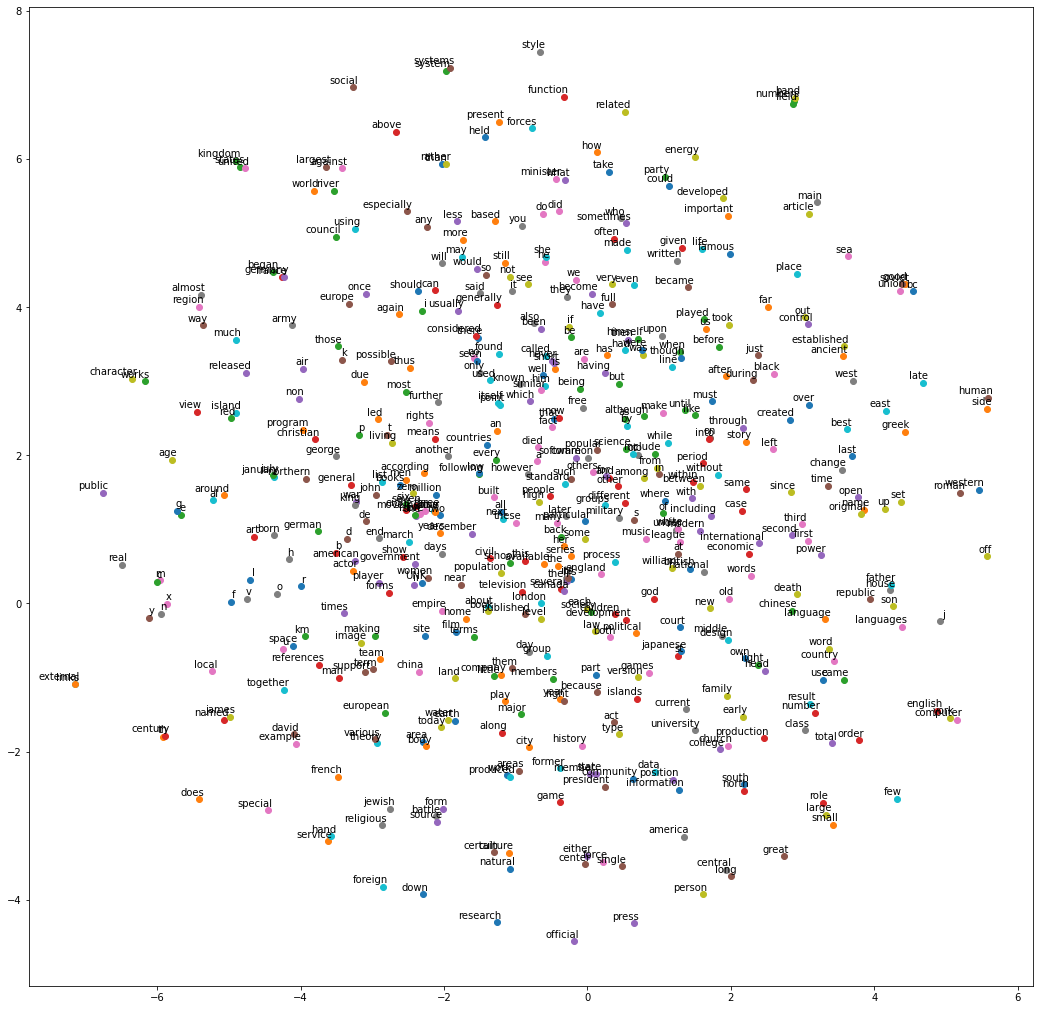

In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 500
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only,:])
labels = [vocabulary[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels)

## 기계번역

basic_rnn_seq2seq()은 간단한 인코더/디코더 모델을 만든다.

In [25]:
import tensorflow as tf

tf.reset_default_graph()

n_steps = 50
n_neurons = 200
n_layers = 3
num_encoder_symbols = 20000
num_decoder_symbols = 20000
embedding_size = 150
learning_rate = 0.01

X = tf.placeholder(tf.int32, [None, n_steps]) # English sentences
Y = tf.placeholder(tf.int32, [None, n_steps]) # French translations
W = tf.placeholder(tf.float32, [None, n_steps - 1, 1])
Y_input = Y[:, :-1]
Y_target = Y[:, 1:]

encoder_inputs = tf.unstack(tf.transpose(X)) # list of 1D tensors
decoder_inputs = tf.unstack(tf.transpose(Y_input)) # list of 1D tensors

lstm_cells = [tf.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons)
              for layer in range(n_layers)]
cell = tf.nn.rnn_cell.MultiRNNCell(lstm_cells)

output_seqs, states = tf.contrib.legacy_seq2seq.embedding_rnn_seq2seq(
    encoder_inputs,
    decoder_inputs,
    cell,
    num_encoder_symbols,
    num_decoder_symbols,
    embedding_size)

logits = tf.transpose(tf.unstack(output_seqs), perm=[1, 0, 2])

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype arg

In [26]:
logits_flat = tf.reshape(logits, [-1, num_decoder_symbols])
Y_target_flat = tf.reshape(Y_target, [-1])
W_flat = tf.reshape(W, [-1])
xentropy = W_flat * tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y_target_flat, logits=logits_flat)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()